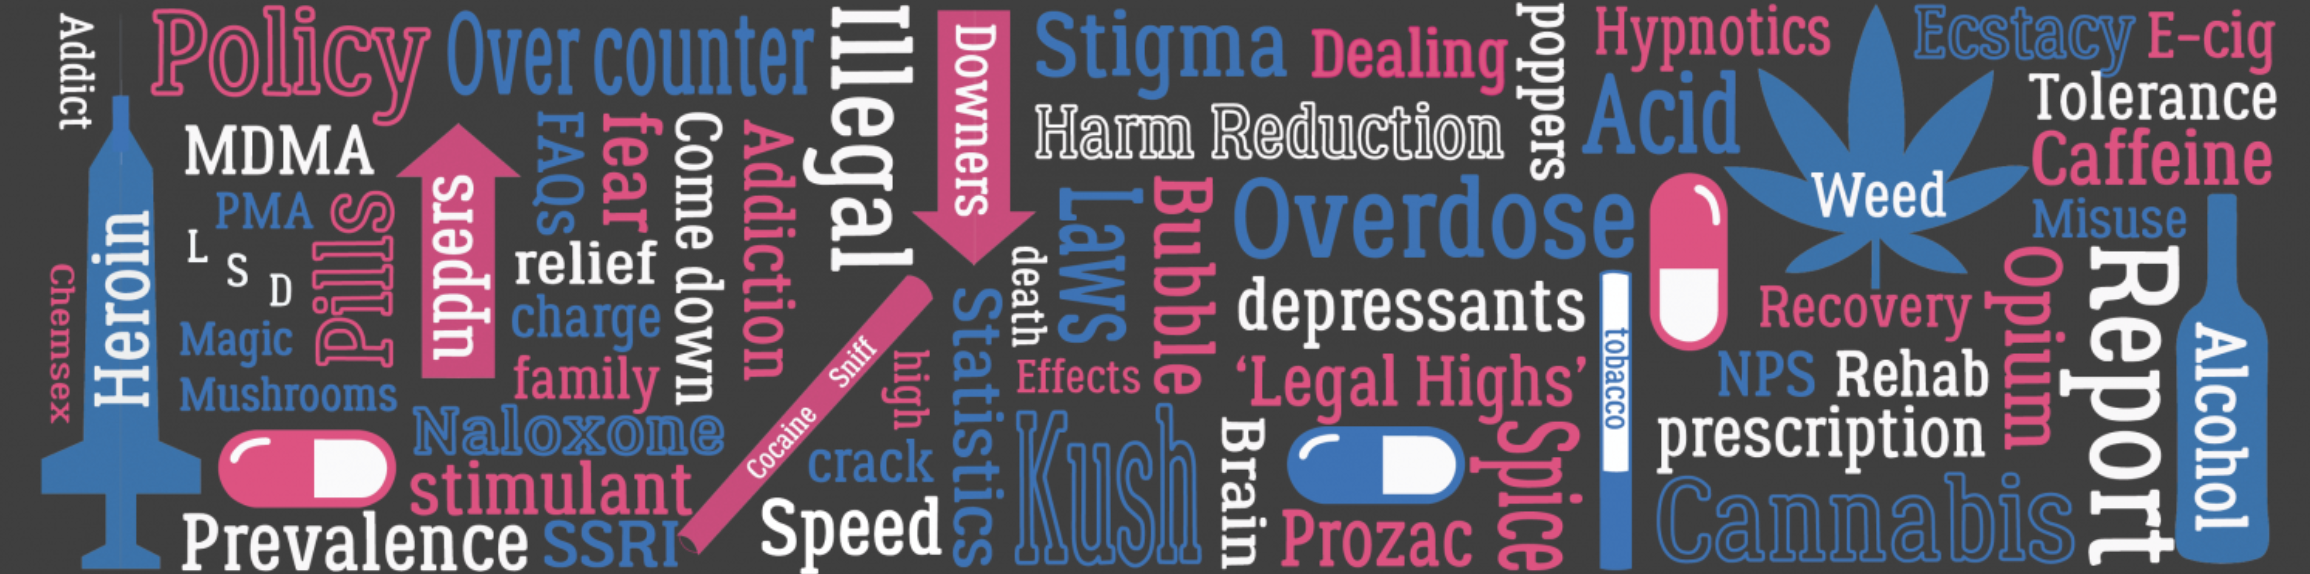

**Introduction:** 
- This Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. 
- All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
- Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"

# Loading the data 

Clear namespace:

In [250]:
reset -fs

## Import modules and packages 

In [251]:
# Base modules
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


#sklearn moduls
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RepeatedStratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing 
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, fbeta_score, accuracy_score, make_scorer, classification_report, confusion_matrix
from time import time

#Image processing
from pprint import pprint
from IPython.display import display_html, display ,Image

# set ip magic command
%matplotlib inline

# set viz style
sns.set_theme(style="ticks")

## Load dataframe 

In [252]:
# load the dataframe
data = pd.read_excel('data/drug_consumption.xls')

In [253]:
# check data structure
data.shape

(1885, 32)

In [254]:
# get first overview over the content
data.head().T

0        1        2        3        4
ID               1        2        3        4        5
Age        0.49788 -0.07854  0.49788 -0.95197  0.49788
Gender     0.48246 -0.48246 -0.48246  0.48246  0.48246
Education -0.05921  1.98437 -0.05921  1.16365  1.98437
Country    0.96082  0.96082  0.96082  0.96082  0.96082
Ethnicity    0.126 -0.31685 -0.31685 -0.31685 -0.31685
Nscore     0.31287 -0.67825 -0.46725 -0.14882  0.73545
Escore    -0.57545  1.93886  0.80523 -0.80615  -1.6334
Oscore    -0.58331  1.43533 -0.84732 -0.01928 -0.45174
Ascore    -0.91699  0.76096  -1.6209  0.59042 -0.30172
Cscore    -0.00665 -0.14277  -1.0145  0.58489  1.30612
Impulsive -0.21712 -0.71126 -1.37983 -1.37983 -0.21712
SS        -1.18084 -0.21575  0.40148 -1.18084 -0.21575
Alcohol        CL5      CL5      CL6      CL4      CL4
Amphet         CL2      CL2      CL0      CL0      CL1
Amyl           CL0      CL2      CL0      CL0      CL1
Benzos         CL2      CL0      CL0      CL3      CL0
Caff           CL6      CL6      CL6      CL5      CL6
Cannabis       CL0      CL4      CL3      CL2      CL3
Choc           CL5      CL6      CL4      CL4      CL6
Coke           CL0      CL3      CL0      CL2      CL0
Crack          CL0      CL0      CL0      CL0      CL0
Ecstasy        CL0      CL4      CL0      CL0      CL1
Heroin         CL0      CL0      CL0      CL0      CL0
Ketamine       CL0      CL2      CL0      CL2      CL0
Legalh         CL0      CL0      CL0      CL0      CL1
LSD            CL0      CL2      CL0      CL0      CL0
Meth           CL0      CL3      CL0      CL0      CL0
Shrooms        CL0      CL0      CL1      CL0      CL2
Nicotine       CL2      CL4      CL0      CL2      CL2
Semer          CL0      CL0      CL0      CL0      CL0
VSA            CL0      CL0      CL0      CL0      CL0

In [255]:
# investigate column names
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

The columns names and data description indicates that the features of the dataset are primarely grouped into three categories. For a further usage we name these three categories and assign the mathing columns to them:

In [256]:
general = data.columns[1:6]
psychometrics = data.columns[6:13]
drugs = data.columns[13:]
print(f'Each row of the dataset is indexed with an ID '
      f'and holds information about {len(general)} general '
      f'and {len(psychometrics)} psychometric features, '
      f'as well as about the usage frequency of {len(drugs)} drugs.'
     )

Each row of the dataset is indexed with an ID and holds information about 5 general and 7 psychometric features, as well as about the usage frequency of 19 drugs.


# Data Cleaning 

## Check for missing values 

In [257]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

No missing values to deal with.

## Check for duplicates

In [258]:
# There is only the id column where duplicates could be of interest:

data.ID.duplicated().sum()

0

No ID duplicates to handle.

## Check for datatype consistency 

In [259]:
data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

The dataset is indexed by a numerical ID. The drug-usage columns hold categorical values, while all other attributes were initially transformed to numerical distribution values. Therefore the type checking showed no anomalies to deal with.

## Value Transformation

As it's impossible to understand the meaning of the numerical transformation of the general data, we decided to translate to create an additional dataframe, holding the translations to the numerical values:

### Create new dataframe 

In [260]:
df = data.copy()

### Transform general data 

In [261]:
# change float value to str for dict accessing
df.Age = df.Age.astype(str)

# create dict from description data
age_dict = {
            '-0.95197' : '18-24',
            '-0.07854' : '25-34',
            '0.49788' : '35-44', 
            '1.09449' : '45-54',
            '1.82213' : '55-64',
            '2.59171' : '65+' 
            }

# replace values with dict data
df.Age = df.Age.replace(age_dict)

# check if only valid entries are left
df.Age.unique()

array(['35-44', '25-34', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [262]:
df.Gender = df.Gender.astype(str)

gender_dict = {
            '0.48246' : 'Female', 
            '-0.48246':'Male'
            }

df['Gender'] = df.Gender.replace(gender_dict)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [263]:
df.Education = df.Education.astype(str)

Education_dict = {
            '-2.43591' : 'Left school before 16 years',
            '-1.7379' : 'Left school at 16 years ',
            '-1.43719' : 'Left school at 17 years' ,
            '-1.22751' : 'Left school at 18 years ',
            '-0.61113' : 'Some college or university, no certificate or degree' ,
            '-0.05921' : 'Professional certificate/ diploma' ,
            '0.45468' : 'University degree' ,
            '1.16365' : 'Masters degree' ,
            '1.98437' : 'Doctorate degree' 
            }

df.Education = df.Education.replace(Education_dict)
df.Education.unique()

array(['Professional certificate/ diploma', 'Doctorate degree',
       'Masters degree', 'Left school at 18 years ',
       'Left school at 16 years ', 'University degree',
       'Some college or university, no certificate or degree',
       'Left school before 16 years', 'Left school at 17 years'],
      dtype=object)

In [264]:
df.Country = df.Country.astype(str)

Country_dict = {
            '-0.09765' : 'Australia',
            '0.24923' : 'Canada' ,
            '-0.46841' : 'New Zealand',
            '-0.28519' : 'Other',
            '0.21128' : 'Republic of Ireland',
            '0.96082' : 'UK',
            '-0.57009' : 'USA' 
            }

df.Country = df.Country.replace(Country_dict)
df.Country.unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [265]:
df.Ethnicity = df.Ethnicity.astype(str)

Ethnicity_dict = {
            '-0.50212': 'Asian' ,
            '-1.10702' : 'Black' ,
            '1.90725' : 'Mixed-Black/Asian' ,
            '0.126' : 'Mixed-White/Asian' ,
            '-0.22166' : 'Mixed-White/Black' ,
            '0.1144' : 'Other' ,
            '-0.31685' : 'White' 
            }

df.Ethnicity = df.Ethnicity.replace(Ethnicity_dict)
df.Ethnicity.unique()

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

### Transform psychometrics

**N-score (Neuroticism)**

In [266]:
# create dict
keys = np.sort(df.Nscore.unique())
values = [x for x in range(12,61)]    #range based on dataset description 
Nscore_dict = dict(zip(keys, values))

# replace values
df.Nscore = df.Nscore.replace(Nscore_dict)

# check if only valid entries are left
df.Nscore.unique()

array([39., 29., 31., 34., 43., 24., 42., 33., 26., 56., 28., 27., 19.,
       22., 41., 49., 32., 25., 40., 51., 35., 36., 46., 44., 37., 47.,
       23., 30., 38., 18., 45., 17., 53., 50., 60., 21., 54., 59., 48.,
       20., 55., 16., 57., 52., 58., 14., 15., 13., 12.])

**E-score (Extraversion)**

In [267]:
# create dict
keys = np.sort(df.Escore.unique())
values = [16] + [x for x in range(18,57)] + [58, 59]    #range based on dataset description 
Escore_dict = dict(zip(keys, values))

# replace values
df.Escore = df.Escore.replace(Escore_dict)

# check if only valid entries are left
df.Escore.unique()

array([36., 52., 45., 34., 28., 38., 32., 55., 40., 41., 49., 29., 31.,
       39., 27., 43., 33., 16., 44., 37., 51., 42., 48., 46., 47., 35.,
       50., 30., 26., 58., 53., 54., 23., 22., 24., 19., 20., 21., 25.,
       56., 59., 18.])

**O-score (Openess to experience)**

In [268]:
# create dict
keys = np.sort(df.Oscore.unique())
values = [24, 26] + [x for x in range(28,61)]    #range based on dataset description 
Oscore_dict = dict(zip(keys, values))

# replace values
df.Oscore = df.Oscore.replace(Oscore_dict)

# check if only valid entries are left
df.Oscore.unique()

array([42., 55., 40., 46., 43., 35., 39., 36., 38., 47., 49., 34., 44.,
       45., 29., 51., 37., 54., 24., 41., 52., 48., 28., 53., 32., 33.,
       26., 31., 50., 58., 30., 56., 57., 60., 59.])

**A-score (Agreeableness)**

In [269]:
# create dict
keys = np.sort(df.Ascore.unique())
values = [12, 16, 18] + [x for x in range(23,61)]    #range based on dataset description 
Ascore_dict = dict(zip(keys, values))

# replace values
df.Ascore = df.Ascore.replace(Ascore_dict)

# check if only valid entries are left
df.Ascore.unique()

array([37., 48., 32., 47., 41., 55., 38., 30., 49., 39., 36., 45., 40.,
       53., 50., 43., 33., 46., 51., 23., 44., 29., 54., 42., 35., 34.,
       52., 31., 57., 56., 27., 25., 28., 58., 26., 59., 24., 18., 12.,
       16., 60.])

**C-score (Conscientiousness)**

In [270]:
# create dict
keys = np.sort(df.Cscore.unique())
values = [17] + [x for x in range(19,58)] + [59]    #range based on dataset description 
Cscore_dict = dict(zip(keys, values))

# replace values
df.Cscore = df.Cscore.replace(Cscore_dict)

# check if only valid entries are left
df.Cscore.unique()

array([42., 41., 34., 46., 50., 52., 48., 49., 43., 53., 38., 36., 59.,
       47., 31., 30., 33., 35., 51., 25., 37., 45., 39., 44., 27., 40.,
       29., 54., 55., 32., 56., 20., 28., 26., 22., 24., 23., 19., 17.,
       21., 57.])

**Impulsiveness and Sensation Seeking**

The corresponding values for the t-statistics of the columns Impulsiveness and Sensation Seeking are not available, therefore we couldn't transform the data. 


## Outlier handling 

As part of the distribution review it turned out, that we don't have to deal with ouutliers in this dataset.

In [271]:
df.head().T

0                 1  \
ID                                         1                 2   
Age                                    35-44             25-34   
Gender                                Female              Male   
Education  Professional certificate/ diploma  Doctorate degree   
Country                                   UK                UK   
Ethnicity                  Mixed-White/Asian             White   
Nscore                                    39                29   
Escore                                    36                52   
Oscore                                    42                55   
Ascore                                    37                48   
Cscore                                    42                41   
Impulsive                           -0.21712          -0.71126   
SS                                  -1.18084          -0.21575   
Alcohol                                  CL5               CL5   
Amphet                                   CL2               CL2   
Amyl                                     CL0               CL2   
Benzos                                   CL2               CL0   
Caff                                     CL6               CL6   
Cannabis                                 CL0               CL4   
Choc                                     CL5               CL6   
Coke                                     CL0               CL3   
Crack                                    CL0               CL0   
Ecstasy                                  CL0               CL4   
Heroin                                   CL0               CL0   
Ketamine                                 CL0               CL2   
Legalh                                   CL0               CL0   
LSD                                      CL0               CL2   
Meth                                     CL0               CL3   
Shrooms                                  CL0               CL0   
Nicotine                                 CL2               CL4   
Semer                                    CL0               CL0   
VSA                                      CL0               CL0   

                                           2               3                 4  
ID                                         3               4                 5  
Age                                    35-44           18-24             35-44  
Gender                                  Male          Female            Female  
Education  Professional certificate/ diploma  Masters degree  Doctorate degree  
Country                                   UK              UK                UK  
Ethnicity                              White           White             White  
Nscore                                    31              34                43  
Escore                                    45              34                28  
Oscore                                    40              46                43  
Ascore                                    32              47                41  
Cscore                                    34              46                50  
Impulsive                           -1.37983        -1.37983          -0.21712  
SS                                   0.40148        -1.18084          -0.21575  
Alcohol                                  CL6             CL4               CL4  
Amphet                                   CL0             CL0               CL1  
Amyl                                     CL0             CL0               CL1  
Benzos                                   CL0             CL3               CL0  
Caff                                     CL6             CL5               CL6  
Cannabis                                 CL3             CL2               CL3  
Choc                                     CL4             CL4               CL6  
Coke                                     CL0             CL2               CL0  
Crack                                    CL0             CL0               CL0  
E

## Dropping unecessary values

In [272]:
# there is no use for the id column, so we drop it entirely
df.drop(columns='ID', inplace=True)

In [273]:
df.head()

Age  Gender                          Education Country  \
0  35-44  Female  Professional certificate/ diploma      UK   
1  25-34    Male                   Doctorate degree      UK   
2  35-44    Male  Professional certificate/ diploma      UK   
3  18-24  Female                     Masters degree      UK   
4  35-44  Female                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  Ecstasy  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...      CL0   
1              White    29.0    52.0    55.0    48.0    41.0  ...      CL4   
2              White    31.0    45.0    40.0    32.0    34.0  ...      CL0   
3              White    34.0    34.0    46.0    47.0    46.0  ...      CL0   
4              White    43.0    28.0    43.0    41.0    50.0  ...      CL1   

   Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine Semer  VSA  
0     CL0      CL0    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
1     CL0      CL2    CL0  CL2  CL3     CL0      CL4   CL0  CL0  
2     CL0      CL0    CL0  CL0  CL0     CL1      CL0   CL0  CL0  
3     CL0      CL2    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
4     CL0      CL0    CL1  CL0  CL0     CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

## Saving cleaned data 

In [274]:
data.to_csv('data/original_clean.csv', index=False )
df.to_csv('data/transformed_clean.csv', index=False)

To avoid unneccessary repetition of the cleaning process, we store the cleaned data to csv files.

****
<font color=red>**Load dataframe from csv here!**</font>

****
# Data Exploration 

In [275]:
df = pd.read_csv('data/transformed_clean.csv')

## Analyse General Data 

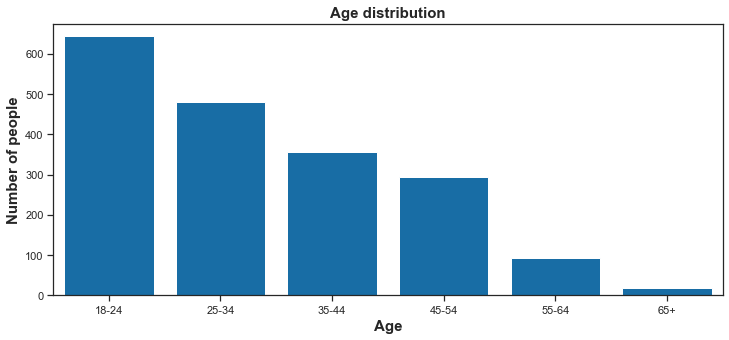

In [276]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Age", data=df, color='#0072BD', order = df['Age'].value_counts().index)

ax.set_title("Age distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15, fontweight="bold")
ax.set_xlabel('Age', fontsize=15, fontweight="bold");

We got mostly young people from age 18-35. We see clearly that the vast majority of the individuals is between 18 and 34 (60%), while the number of observations is decreasing significantly for those inidividuals that are 54 or older.

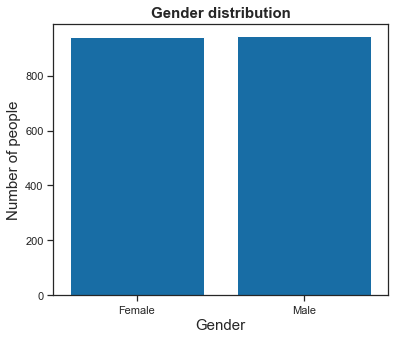

In [277]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="Gender", data=df, color='#0072BD');

ax.set_title("Gender distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Gender', fontsize=15,);

We have a perfect 50/50 split betwenn male and female observations

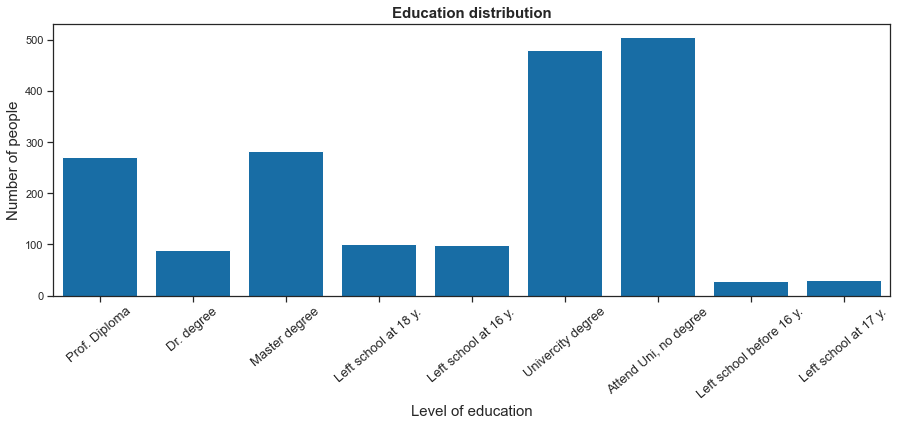

In [278]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Education", data=df, color='#0072BD')

ax.set_title("Education distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Level of education', fontsize=15,)
xticks = ['Prof. Diploma', 'Dr. degree', 'Master degree','Left school at 18 y.','Left school at 16 y.', 
          'Univercity degree', 'Attend Uni, no degree', 'Left school before 16 y.', 'Left school at 17 y.']
ax.set_xticklabels(xticks, fontsize=13, rotation=40);

More than a quarter of the observed individuals hold at least a degree from one college or university. Summing also the University, Masters degree as well as Professional diploma it's getting pretty obvious that we have an extremly well educated population here, who won't represent the overall population of the countries in focus.

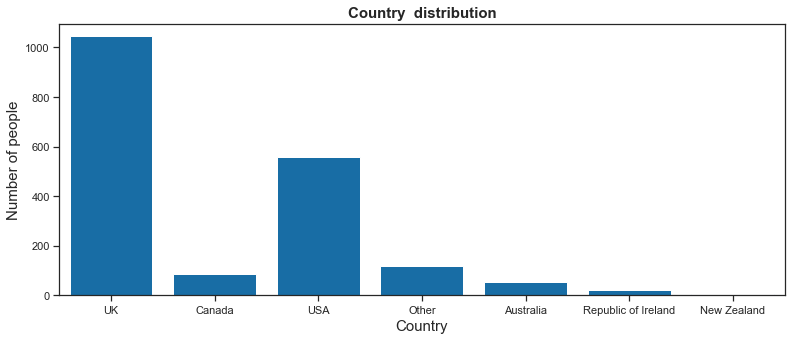

In [279]:
plt.figure(figsize=(13,5))
ax = sns.countplot(x="Country", data=df, color='#0072BD')
ax.set_title("Country  distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Country', fontsize=15,);

We got only English speaking countries. We have not enough samples besides the UK and the USA so it seems useless to use this feature. Plus: The amount of drug users is so different between the countries that we expect that the sample are biased.
Therefore we are most probably going to drop "country". 

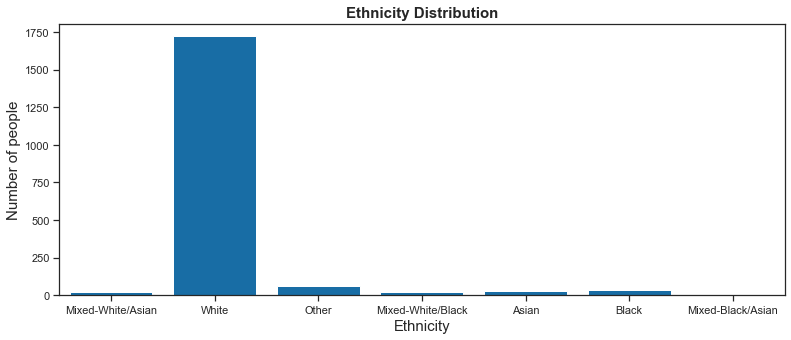

In [280]:
plt.figure(figsize=(13,5))
ax = sns.countplot(x="Ethnicity", data=df, color='#0072BD')
ax.set_title("Ethnicity Distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Number of people', fontsize=15,)
ax.set_xlabel('Ethnicity', fontsize=15,);

As already said when checking the education feature the sample populations seems to be extremly biased. More than 91 % white individuals do not represent the overall population of the participating countries. The correlation mapping doesn't show much correlation to the usage of hard drugs so we are going to drop this feature as well.


In [281]:
# create function to have multiple dataframes plotted side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# show occurrences and percentages
age_df = pd.DataFrame(df.Age.value_counts())
age_df['percentage'] = round(((age_df.Age / age_df.Age.sum())*100), 0)


gender_df = pd.DataFrame(df.Gender.value_counts())
gender_df['percentage'] = round(((gender_df.Gender / gender_df.Gender.sum())*100), 0)

ed_df = pd.DataFrame(df.Education.value_counts())
ed_df['percentage'] = round(((ed_df.Education / ed_df.Education.sum())*100), 0)

eth_df = pd.DataFrame(df.Ethnicity.value_counts())
eth_df['percentage'] = round(((eth_df.Ethnicity / eth_df.Ethnicity.sum())*100), 0)


display_side_by_side(age_df, gender_df, ed_df, eth_df)


Age 
 percentage 
 
 
 
 
 18-24 
 643 
 34.0 
 
 
 25-34 
 481 
 26.0 
 
 
 35-44 
 356 
 19.0 
 
 
 45-54 
 294 
 16.0 
 
 
 55-64 
 93 
 5.0 
 
 
 65+ 
 18 
 1.0 
 
 
 
 
 
 
 Gender 
 percentage 
 
 
 
 
 Male 
 943 
 50.0 
 
 
 Female 
 942 
 50.0 
 
 
 
 
 
 
 Education 
 percentage 
 
 
 
 
 Some college or university, no certificate or degree 
 506 
 27.0 
 
 
 University degree 
 480 
 25.0 
 
 
 Masters degree 
 283 
 15.0 
 
 
 Professional certificate/ diploma 
 270 
 14.0 
 
 
 Left school at 18 years 
 100 
 5.0 
 
 
 Left school at 16 years 
 99 
 5.0 
 
 
 Doctorate degree 
 89 
 5.0 
 
 
 Left school at 17 years 
 30 
 2.0 
 
 
 Left school before 16 years 
 28 
 1.0 
 
 
 
 
 
 
 Ethnicity 
 percentage 
 
 
 
 
 White 
 1720 
 91.0 
 
 
 Other 
 63 
 3.0 
 
 
 Black 
 33 
 2.0 
 
 
 Asian 
 26 
 1.0 
 
 
 Mixed-White/Asian 
 20 
 1.0 
 
 
 Mixed-White/Black 
 20 
 1.0 
 
 
 Mixed-Black/Asian 
 3 
 0.0

**Important observation:** The distribution of ethnicity and education in our dataset doesn't represent the overall distribution for the population in those countries. Therefor we'll have to be extremly carefull when concluding the results of our observations!

## Explore Psychometrics 

**From wikipidia**

In psychological trait theory, the Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a suggested taxonomy, or grouping, for personality traits,[1] developed from the 1980s onwards. When factor analysis (a statistical technique) is applied to personality survey data, it reveals semantic associations: some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". These associations suggest five broad dimensions used in common language to describe the human personality and psyche.

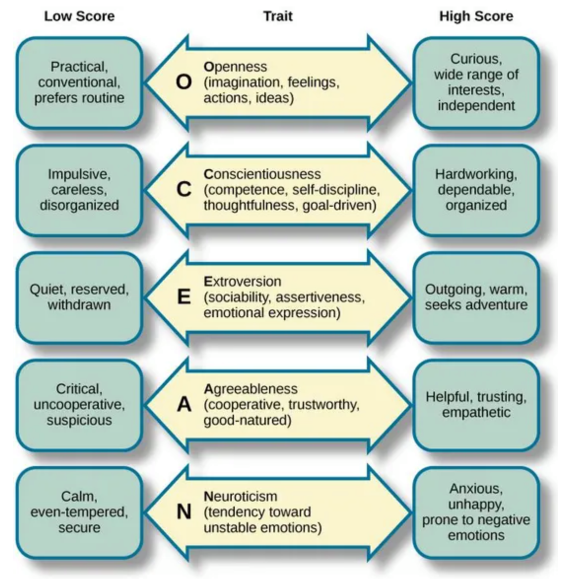


The theory identifies five factors:

- openness to experience (inventive/curious vs. consistent/cautious)
- conscientiousness (efficient/organized vs. extravagant/careless)
- extraversion (outgoing/energetic vs. solitary/reserved)
- agreeableness (friendly/compassionate vs. challenging/callous)
- neuroticism (sensitive/nervous vs. resilient/confident)

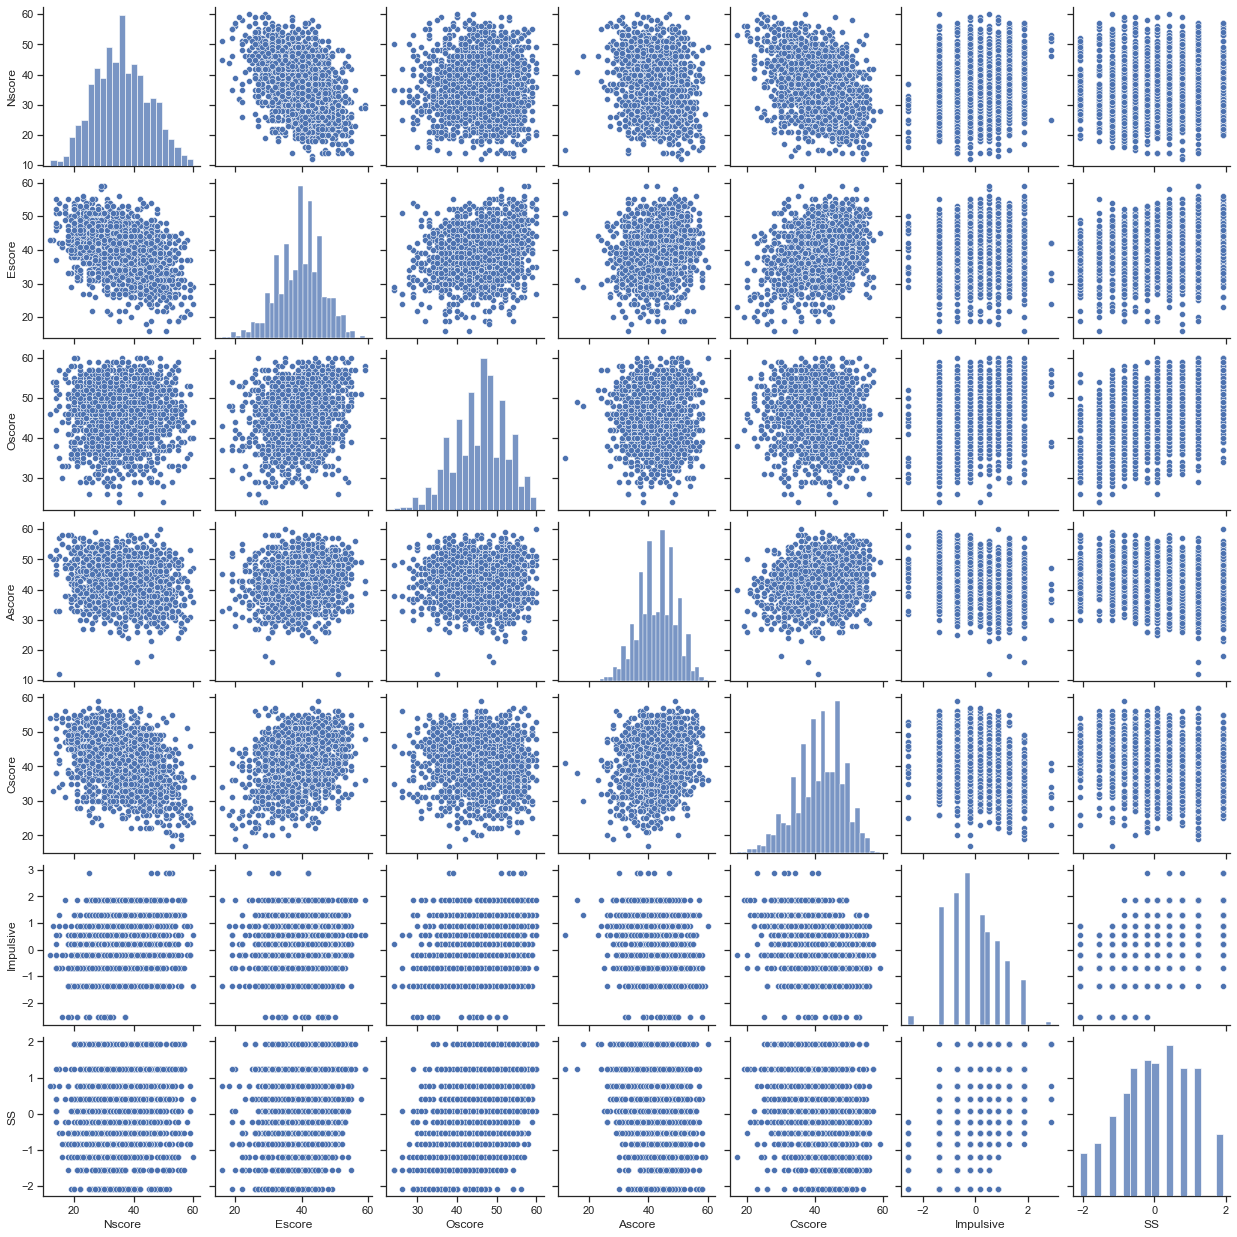

In [282]:
psy_df = pd.DataFrame(data=df, columns=psychometrics)
personality_dum=pd.get_dummies(psy_df.copy())

sns.pairplot(psy_df)

plt.savefig('figures/psychometrics_pairplot.png')

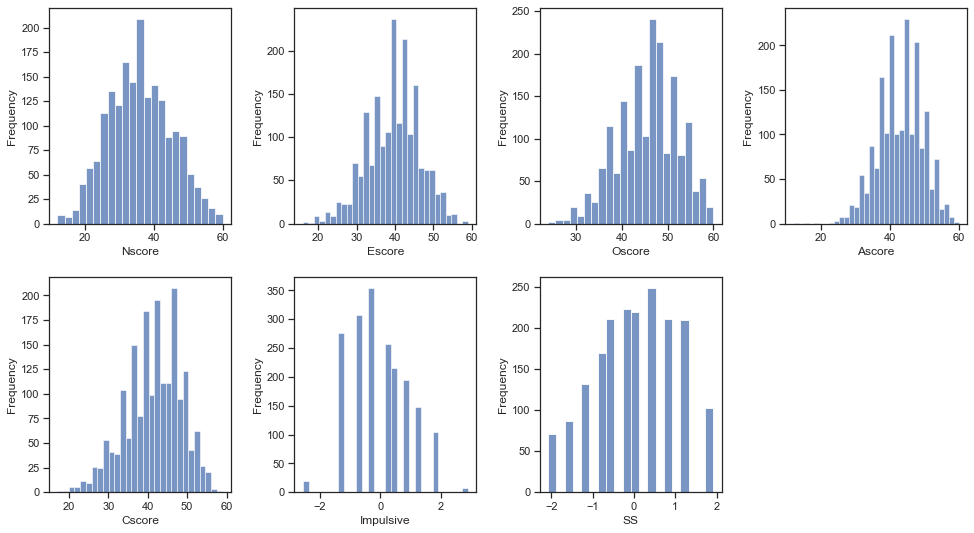

In [283]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

for index, feature in enumerate(psy_df.columns):
    plt.subplot(2, 4, index+1)
    plt.ylabel("Frequency")
    sns.histplot(psy_df[feature])

In [284]:
psy_df.describe().T

count       mean       std       min       25%       50%  \
Nscore     1885.0  35.921485  9.135869  12.00000  29.00000  36.00000   
Escore     1885.0  39.576127  6.771769  16.00000  35.00000  40.00000   
Oscore     1885.0  45.762334  6.579641  24.00000  41.00000  46.00000   
Ascore     1885.0  42.866313  6.438106  12.00000  39.00000  43.00000   
Cscore     1885.0  41.437135  6.966625  17.00000  37.00000  42.00000   
Impulsive  1885.0   0.007216  0.954435  -2.55524  -0.71126  -0.21712   
SS         1885.0  -0.003292  0.963701  -2.07848  -0.52593   0.07987   

                75%       max  
Nscore     42.00000  60.00000  
Escore     44.00000  59.00000  
Oscore     51.00000  60.00000  
Ascore     48.00000  60.00000  
Cscore     46.00000  59.00000  
Impulsive   0.52975   2.90161  
SS          0.76540   1.92173

It seems that we have for all the scores more or less a standard deviation of 1 and from the graphs we see that they are kinda normal distributed. So we are talking about standard normal distribution and if we have a closer look at our source for example for the nscore(how neurotic is a person) we have a scale from 1 to 60 and the people from our dataset are around 20-40. The same goes for the other 4 big of personality traits. So it seems that we deal with 'normal' people.   

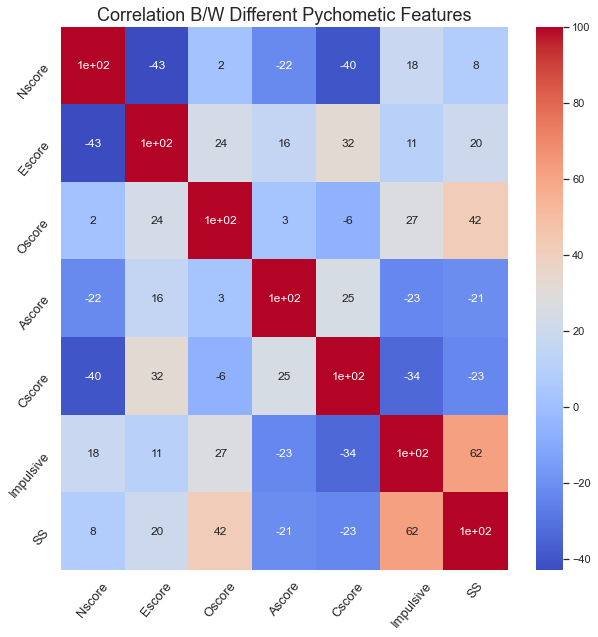

In [285]:
corrmat = round(psy_df.corr()*100,0)

plt.figure(figsize=(10,10))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = psy_df.columns, xticklabels = psy_df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Different Pychometic Features",fontsize=18)
plt.show()

*From this graph we can see that in general:*
- people that scored high in neuroticism, score low in extroversion and consciousness.
- Impulsive people score high in Openness and low in Agreeableness and consciousness
- Extroverts score high in Openness and consciousness
- Sensession seeking people are very impulsive, score high to openness and relatively low in Agreeableness and consciousness 

## Explore Substance Usage 

We know from our source:
- CL0 Never Used 
- CL1 Used over a Decade Ago 
- CL2 Used in Last Decade 
- CL3 Used in Last Year 
- CL4 Used in Last Month 
- CL5 Used in Last Week 
- CL6 Used in Last Day 

For further exploration we define a user of a drug as an individual who has used a drug at east within last year.

In [286]:
df = df.query('Semer == "CL0"')
df = df.drop(columns='Semer')
df.shape

(1877, 30)

Semer turns out to be a fictional drug for quality testing reasons, so we drop all entries including the usage of Semer

In [287]:
df_users = df.copy()

# Feature Engineering

## Separation of soft and hard drugs 

We create a distinction of soft and hard drugs, based on the differentation of the Amsterdam Info website: 
https://www.amsterdam.info/drugs/#:~:text=Soft%20drugs%20as%20cannabis%20in,so%20called%20%22personal%20use%22.

In [288]:
drugs_col = df_users.columns[12:]
drugs_use = ['use_'+i for i in drugs_col]

In [289]:
for column in drugs_col:
    le = LabelEncoder()
    df_users[column] = le.fit_transform(df_users[column])

In [290]:
soft_col = ['Amyl', 'Ecstasy','Legalh', 'LSD', 'VSA', 'Cannabis', 'Shrooms']
soft= df_users.loc[:,soft_col]
hard_col= ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin', 'Meth', 'Ketamine']
hard= df_users.loc[:,hard_col]

In [291]:
# make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    df_users.loc[(df_users[drugs_col[i]] <= 2),drugs_use[i]] = 0
    df_users.loc[(df_users[drugs_col[i]] > 2),drugs_use[i]] = 1

In [292]:
soft_col_use = ['use_Amyl', 
                'use_Ecstasy', 
                'use_Legalh', 
                'use_LSD', 
                'use_VSA', 
                'use_Cannabis', 
                'use_Shrooms'
               ]
hard_col_use = ['use_Amphet', 
                'use_Benzos',
                'use_Coke',
                'use_Crack', 
                'use_Heroin', 
                'use_Meth',
                'use_Ketamine'
                ]
               
hard_use = df_users.loc[:, hard_col_use]
drugs_col = df_users.columns[12:30]
drugs_use = ['use_'+i for i in drugs_col]

In [293]:
df_users.shape

(1877, 48)

In [294]:
520/950

0.5473684210526316

In [295]:
300/950

0.3157894736842105

In [296]:
drugs_col

Index(['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Shrooms', 'Nicotine', 'VSA'],
      dtype='object')

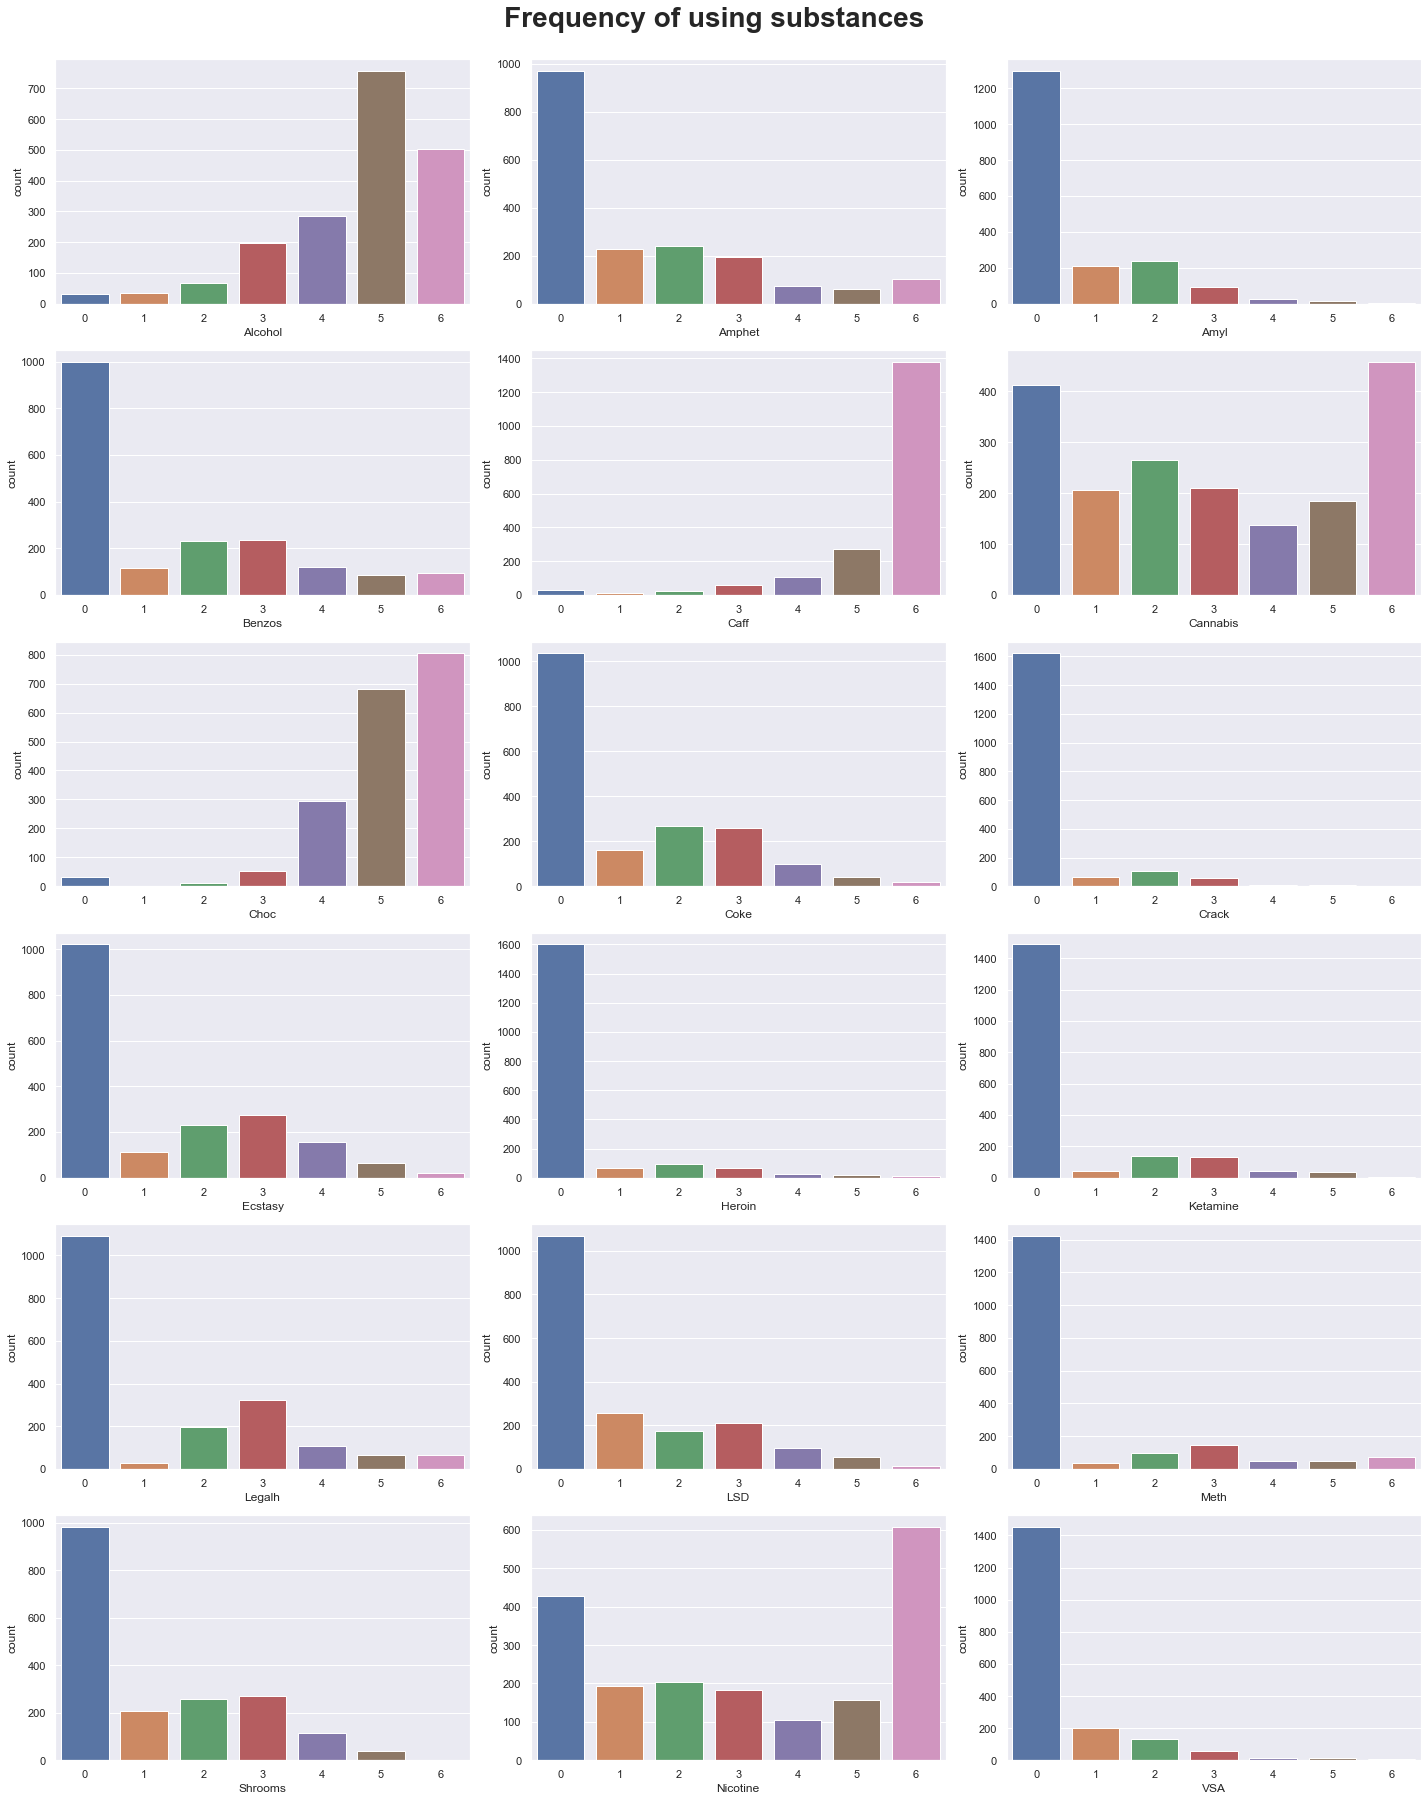

In [297]:
fig, axes = plt.subplots(6,3,figsize = (20,25))
fig.suptitle("Frequency of using substances",fontsize=28, fontweight = 'bold', y= 1)
k=0
for i in range(6):
    for j in range(3):
        sns.countplot(x=drugs_col[k], data=df_users ,ax=axes[i][j],) 
        k+=1 

plt.tight_layout()
plt.show()

In [298]:
count_of_users = []
count_of_non_users = []

In [299]:
for i in range(len(drugs_col)):
    s = df_users.groupby([drugs_use[i]])[drugs_col[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [300]:
len(count_of_users)

18

In [301]:
len(count_of_non_users)

18

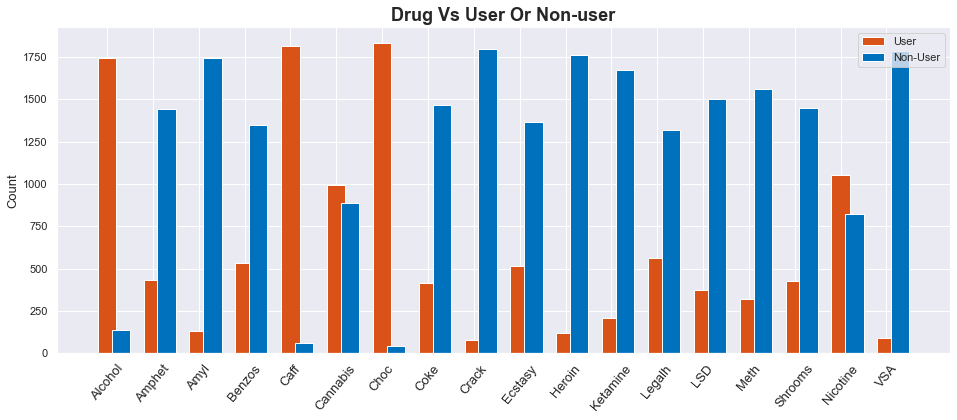

In [302]:
bins = np.arange(1,19,1)
plt.figure(figsize=(16,6))
plt.bar(bins,count_of_users,width=0.4,label ='User', color='#D95319')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User', color='#0072BD')
plt.xticks(bins,drugs_col,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=18, fontweight = 'bold')
plt.legend();

## Overall usage of hard / soft drugs 

In [303]:
df_users['hard_usage'] = pd.np.where(df_users[hard_col_use].eq(1).any(1, skipna=True), 1, 0)

In [304]:
df_users.hard_usage.value_counts()

0    1024
1     853
Name: hard_usage, dtype: int64

In [305]:
853/1877

0.45444858817261585

In [306]:
df_users['soft_usage'] = pd.np.where(df_users[soft_col_use].eq(1).any(1, skipna=True), 1, 0)

In [307]:
df_users.soft_usage.value_counts()

1    1066
0     811
Name: soft_usage, dtype: int64

In [308]:
df_users['drug_usage'] = pd.np.where(df_users[['soft_usage', 'hard_usage']].eq(1).any(1, skipna=True), 1, 0)

In [309]:
df_users.drug_usage.value_counts()

1    1171
0     706
Name: drug_usage, dtype: int64

In [310]:
pers_hard = df_users.iloc[:, 5:12]
pers_hard['hard_usage'] = df_users.hard_usage
pers_hard['soft_usage'] = df_users.soft_usage

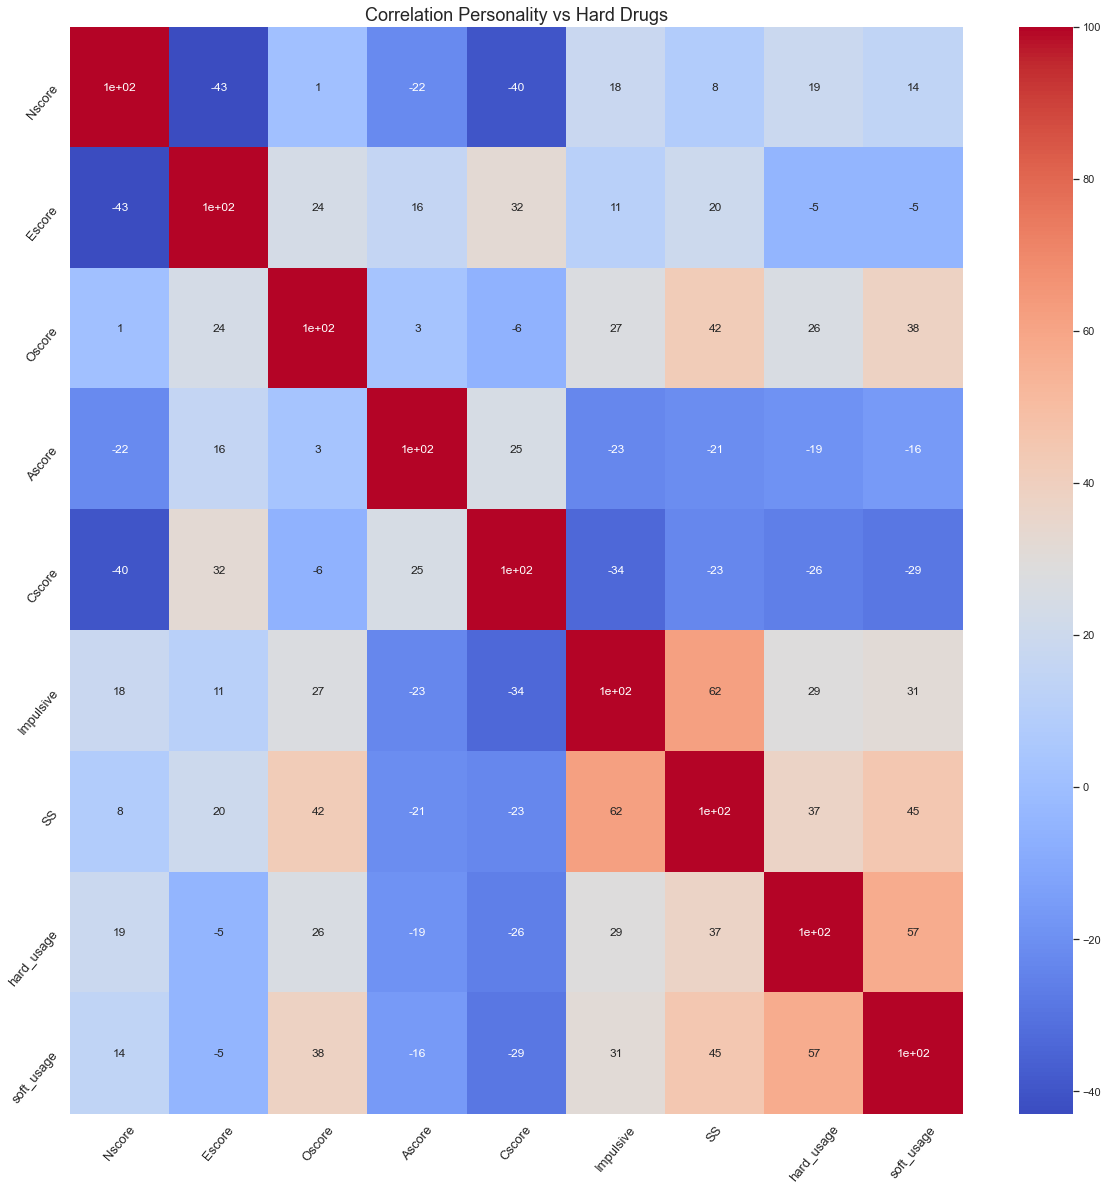

In [311]:
corrmat1 = round(pers_hard.corr()*100,0)

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat1,cmap = 'coolwarm',annot=True,
             yticklabels = pers_hard.columns, xticklabels = pers_hard.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation Personality vs Hard Drugs",fontsize=18)
plt.show();

In [312]:
demo_hard = df_users.iloc[:, 1:5]
demo_hard['hard_usage'] = df_users.hard_usage
demo_hard['soft_usage'] = df_users.soft_usage

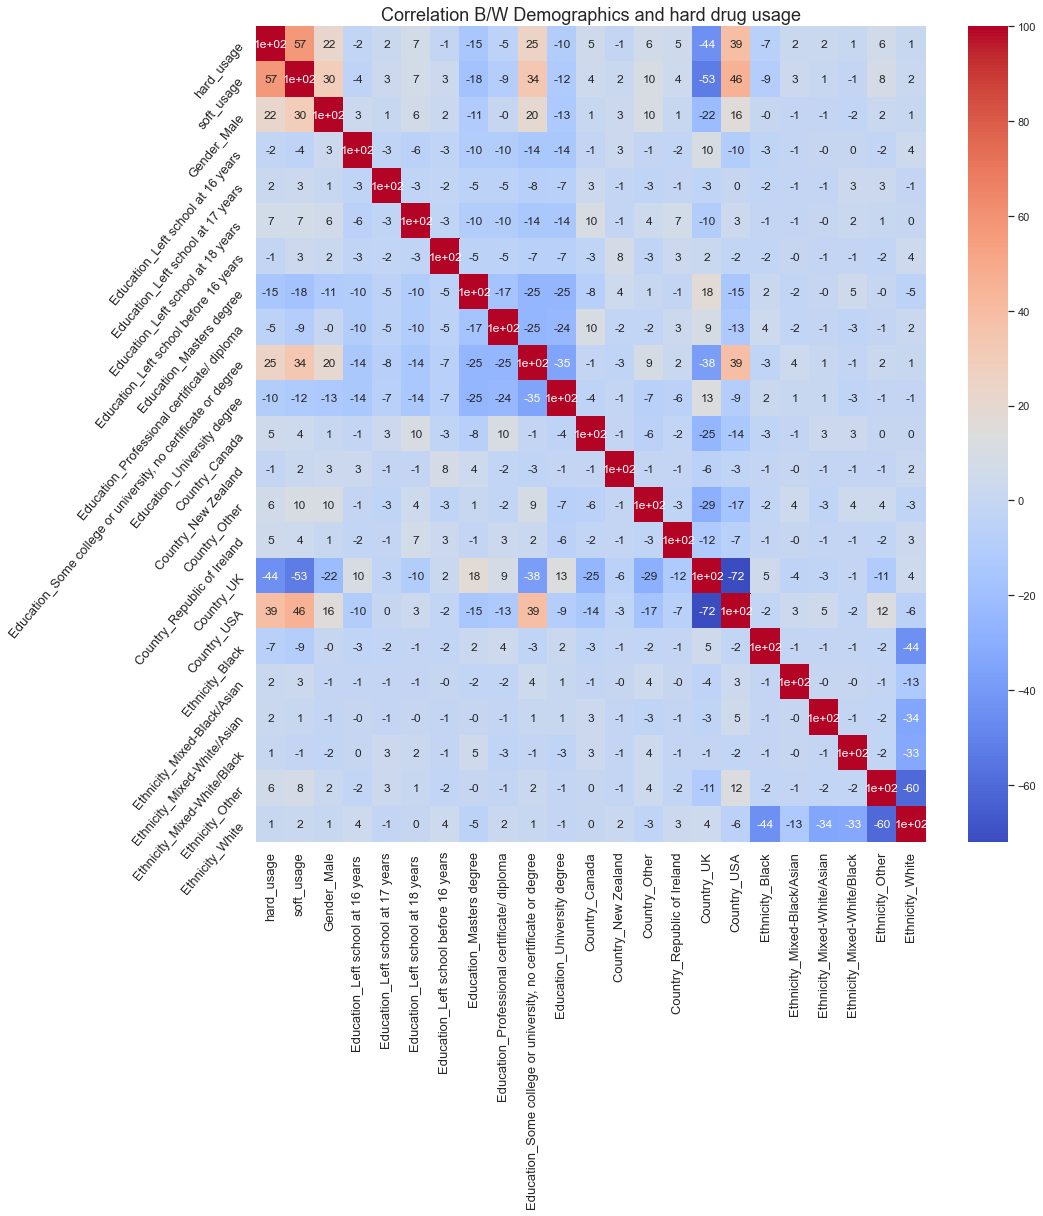

In [313]:
corr_df = demo_hard.copy()


X_dum = pd.get_dummies(demo_hard, drop_first=True)
corrmat = round(X_dum.corr()*100,0)

plt.figure(figsize=(15,15))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = X_dum.columns, xticklabels = X_dum.columns)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Demographics and hard drug usage",fontsize=18)
plt.show()

It's unlikely that the huge difference in correlation between USA/UK and the drug usage is representing the reality. Hence we are dropping the country column for further exploration.

## Finding most common combinations of hard drugs 

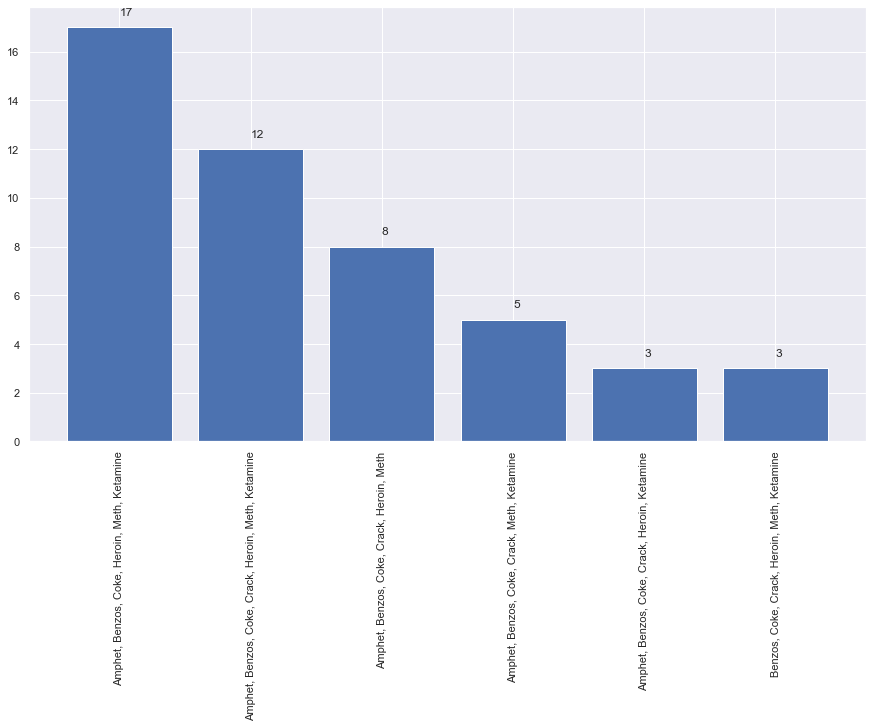

In [314]:
# create a copy of the hard drug usage dateframe
mc = hard_use.copy()

# remove "use_" from column name, replace all True values with corresponding column name
mc.columns = mc.columns.str.replace("use_","")
mc = mc.loc[:, :].replace(1, pd.Series(mc.columns, mc.columns))

# create list from all column values
mc["combination"] = mc.values.tolist()

# delete the zeros
mc.combination = mc.combination.apply(lambda x: [i for i in x if i != 0])

# count number of elements
mc['combi_length'] = mc.combination.apply(lambda x: len(x))

# return results
mc.combination = mc.combination.apply(lambda x: ', '.join(map(str, x)))
result = mc.query("combi_length > 5").combination.value_counts().head(20)
result

# plot results
y = result.values
x = result.index
plt.figure(figsize=(15,8))
plt.bar(x, y)


plt.xticks(rotation=90)
for i, v in enumerate(y):
    plt.text(x=x[i], y=v + 0.5, s=str(v))

In [315]:
mc["lenght_text"] = mc.combi_length.apply(lambda x:"Usage of "+str(x)+" different drugs")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Usage of 0 different drugs'),
  Text(1, 0, 'Usage of 1 different drugs'),
  Text(2, 0, 'Usage of 2 different drugs'),
  Text(3, 0, 'Usage of 3 different drugs'),
  Text(4, 0, 'Usage of 4 different drugs'),
  Text(5, 0, 'Usage of 5 different drugs'),
  Text(6, 0, 'Usage of 6 different drugs'),
  Text(7, 0, 'Usage of 7 different drugs')])

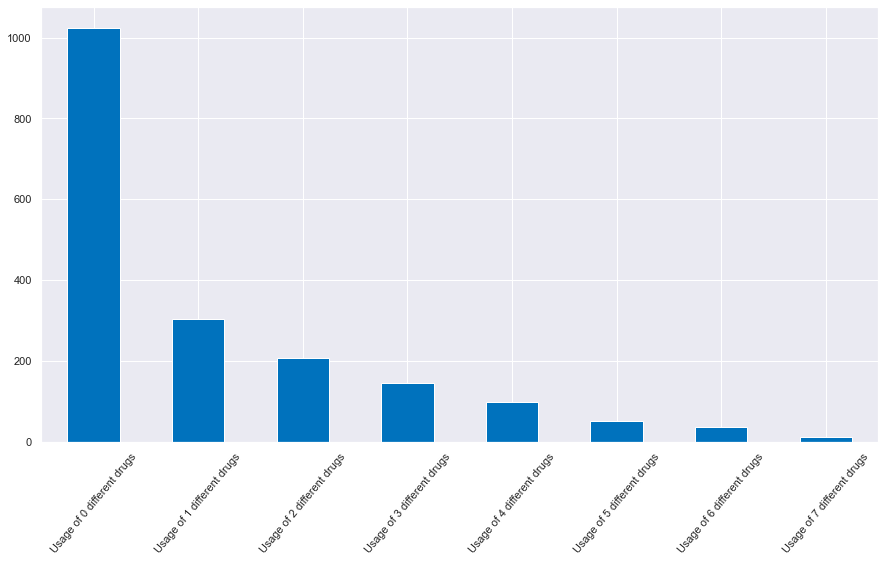

In [316]:
plt.figure(figsize=(15,8))

mc.lenght_text.value_counts().plot(kind="bar", color='#0072BD')
plt.xticks(rotation=50)

### Dropping columns 

In [317]:
ndf = df_users.copy()

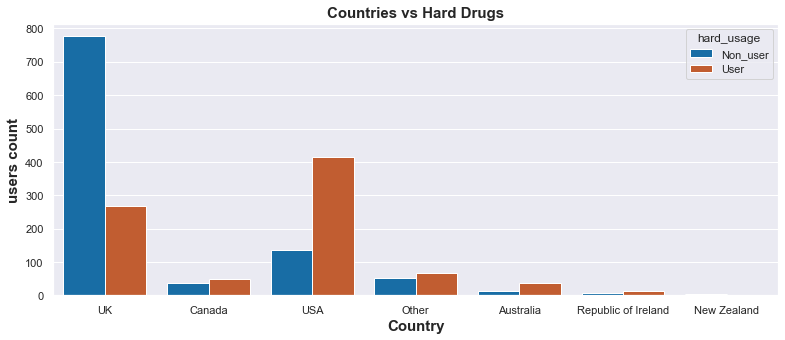

In [318]:
color=['#0072BD','#D95319']
fig, ax = plt.subplots(figsize=(13, 5))

ax = sns.countplot(x = 'Country' , hue = ndf['hard_usage'].apply(lambda x: 'User' if x ==1 else 'Non_user'), 
              data = ndf, palette=color);

ax.set_title("Countries vs Hard Drugs", fontsize=15, fontweight="bold")
ax.set_ylabel('users count', fontsize=15, fontweight="bold")
ax.set_xlabel('Country', fontsize=15, fontweight="bold")
plt.savefig("figures/DrugUsage_country.png")

We can see a huge difference between the people clamming to be hard drug users in USA than in UK

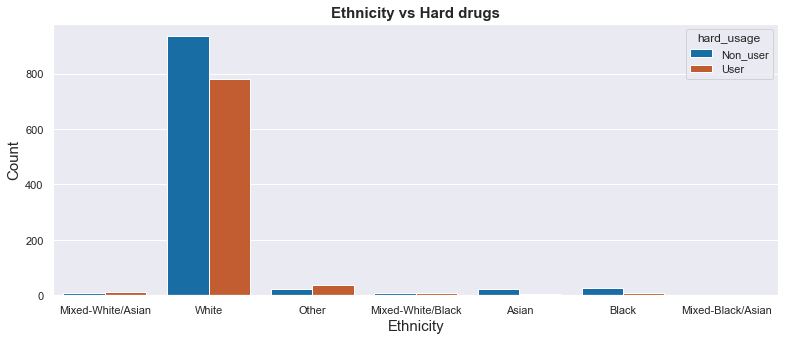

In [319]:
plt.figure(figsize=(13,5))
ax = sns.countplot(x = 'Ethnicity' , hue = ndf['hard_usage'].apply(lambda x: 'User' if x ==1 else 'Non_user',), 
              data = ndf,palette=color)

ax.set_title("Ethnicity vs Hard drugs", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15,)
ax.set_xlabel('Ethnicity', fontsize=15,);

In [320]:
df_users = df_users.drop(columns=["Ethnicity", "Country"])

In [321]:
df_users.head()

Age  Gender                          Education  Nscore  Escore  Oscore  \
0  35-44  Female  Professional certificate/ diploma    39.0    36.0    42.0   
1  25-34    Male                   Doctorate degree    29.0    52.0    55.0   
2  35-44    Male  Professional certificate/ diploma    31.0    45.0    40.0   
3  18-24  Female                     Masters degree    34.0    34.0    46.0   
4  35-44  Female                   Doctorate degree    43.0    28.0    43.0   

   Ascore  Cscore  Impulsive       SS  ...  use_Ketamine  use_Legalh  use_LSD  \
0    37.0    42.0   -0.21712 -1.18084  ...           0.0         0.0      0.0   
1    48.0    41.0   -0.71126 -0.21575  ...           0.0         0.0      0.0   
2    32.0    34.0   -1.37983  0.40148  ...           0.0         0.0      0.0   
3    47.0    46.0   -1.37983 -1.18084  ...           0.0         0.0      0.0   
4    41.0    50.0   -0.21712 -0.21575  ...           0.0         0.0      0.0   

   use_Meth  use_Shrooms  use_Nicotine  use_VSA  hard_usage  soft_usage  \
0       0.0          0.0           0.0      0.0           0           0   
1       1.0          0.0           1.0      0.0           1           1   
2       0.0          0.0           0.0      0.0           0           1   
3       0.0          0.0           0.0      0.0           1           0   
4       0.0          0.0           0.0      0.0           0           1   

   drug_usage  
0           0  
1           1  
2           1  
3           1  
4           1  

[5 rows x 49 columns]

# Baseline Prediction Modeling on Target Variables 

## Create our pipeline function

In [322]:
def pipeline_test(X,y):
    categoric_features = list(X.columns[X.dtypes==object])
    categoric_features

    numeric_features = list(X.columns[X.dtypes != object])
    numeric_features

    # split train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


    # defining the models
    models = [
        RandomForestClassifier, 
        XGBClassifier,
        KNeighborsClassifier,
        SVC,
        LogisticRegression,
        AdaBoostClassifier,
        DecisionTreeClassifier,
    ]

    # create preprocessors
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categoric_features)
        ])


    # process pipeline for every model


    for model in models:
        print('\n'+str(model))
        pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('classifier', model())
                               ])


        # fit model
        pipe.fit(X_train, y_train)  


        #predict results
        y_train_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
        y_test_pred = pipe.predict(X_test)

        # print results

        print("\nResults on training data: ")
        print(classification_report(y_train, y_train_pred))
        print("\nResults on test data:")
        print(classification_report(y_test, y_test_pred))
        print()


        # feature importance
        try:
            ohe = (pipe.named_steps['preprocessor'].named_transformers_['cat'].
                   named_steps['onehot'])
            feature_names = ohe.get_feature_names(input_features=categoric_features)
            feature_names = np.r_[feature_names, numeric_features]
            tree_feature_importances = (
                pipe.named_steps['classifier'].feature_importances_)
            sorted_idx = tree_feature_importances.argsort()
            y_ticks = np.arange(0, len(feature_names))
            fig, ax = plt.subplots(figsize=(10, 15))
            ax.barh(y_ticks, tree_feature_importances[sorted_idx])
            ax.set_yticklabels(feature_names[sorted_idx])
            ax.set_yticks(y_ticks)
            ax.set_title("Feature Importances")
            fig.tight_layout()
            plt.show()
        except:
            print('Did not work!')

## Target: User of Hard Drugs 

### Based on demographic and psychometric 


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       763
           1       0.69      0.67      0.68       644

    accuracy                           0.71      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.71      0.71      0.71      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       261
           1       0.66      0.65      0.66       209

    accuracy                           0.70       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.70      0.70      0.70       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


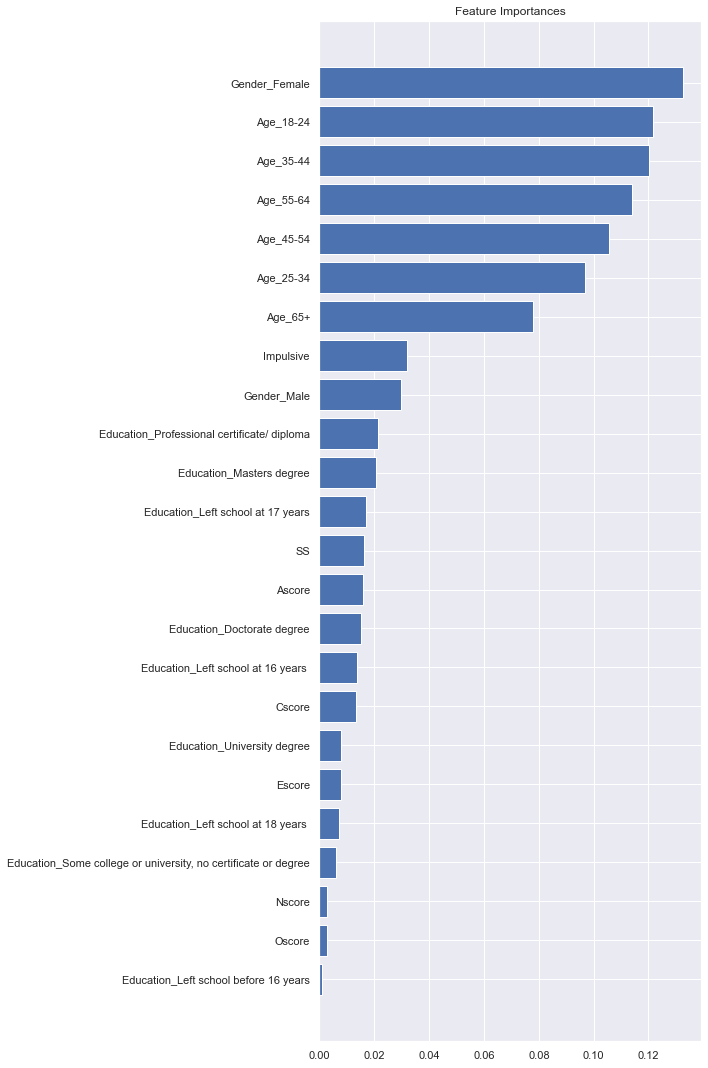


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       763
           1       0.68      0.68      0.68       644

    accuracy                           0.71      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.71      0.71      0.71      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       261
           1       0.67      0.67      0.67       209

    accuracy                           0.71       470
   macro avg       0.70      0.70      0.70       470
weighted avg       0.71      0.71      0.71       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


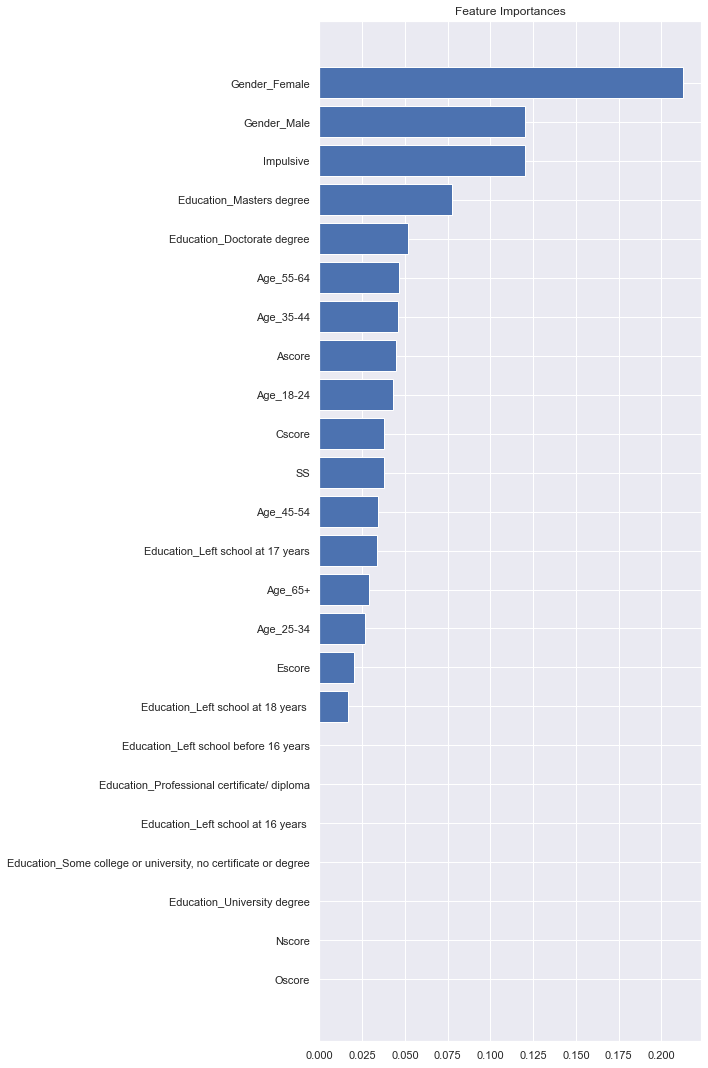


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       763
           1       0.66      0.65      0.65       644

    accuracy                           0.69      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.69      0.69      0.69      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       261
           1       0.65      0.67      0.66       209

    accuracy                           0.69       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.69      0.69      0.69       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       763
           1       0.71      0.72      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


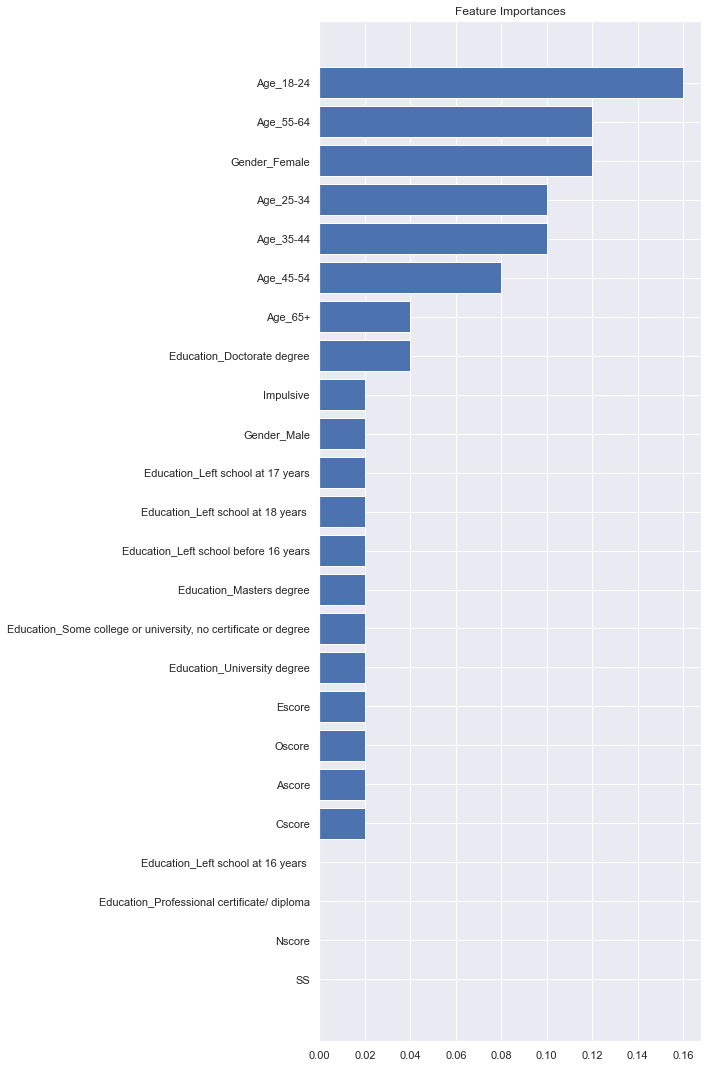


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       763
           1       0.60      0.61      0.60       644

    accuracy                           0.63      1407
   macro avg       0.63      0.63      0.63      1407
weighted avg       0.64      0.63      0.63      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       261
           1       0.58      0.58      0.58       209

    accuracy                           0.63       470
   macro avg       0.62      0.62      0.62       470
weighted avg       0.63      0.63      0.63       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


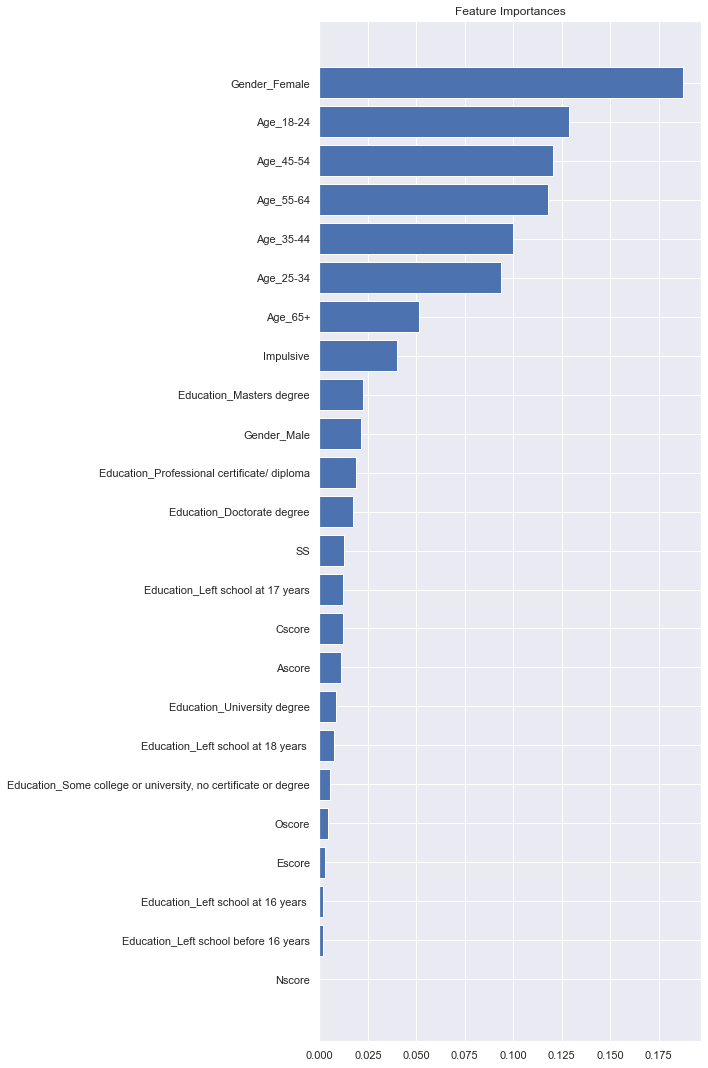

In [323]:
# selecting the features and target (all demographic and psychometrics)
pipeline_test(df_users.iloc[:,:10], df_users.hard_usage)

### Based on demographic and psychometric and soft drug usage

In [324]:
X = df_users.iloc[:,:10]
X['soft_usage'] = df_users.soft_usage
y = df_users.hard_usage


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       763
           1       0.72      0.81      0.76       644

    accuracy                           0.77      1407
   macro avg       0.77      0.77      0.77      1407
weighted avg       0.78      0.77      0.77      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       261
           1       0.69      0.79      0.74       209

    accuracy                           0.75       470
   macro avg       0.75      0.75      0.75       470
weighted avg       0.76      0.75      0.75       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


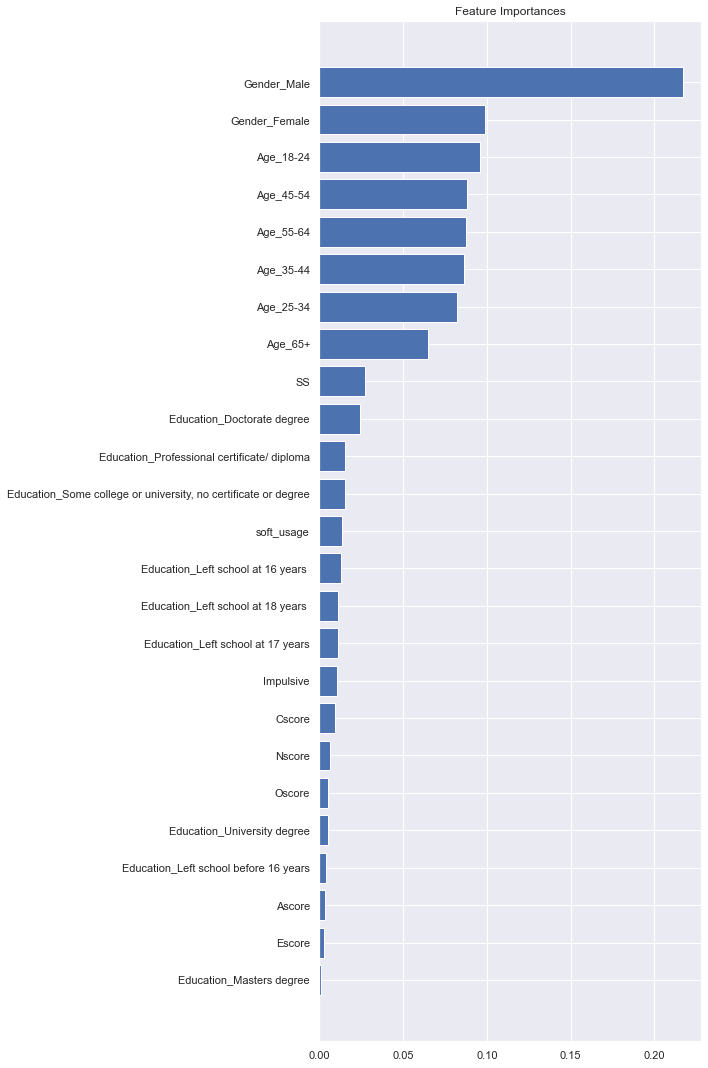


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       763
           1       0.72      0.82      0.77       644

    accuracy                           0.77      1407
   macro avg       0.77      0.77      0.77      1407
weighted avg       0.78      0.77      0.77      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       261
           1       0.69      0.81      0.74       209

    accuracy                           0.75       470
   macro avg       0.75      0.76      0.75       470
weighted avg       0.76      0.75      0.75       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


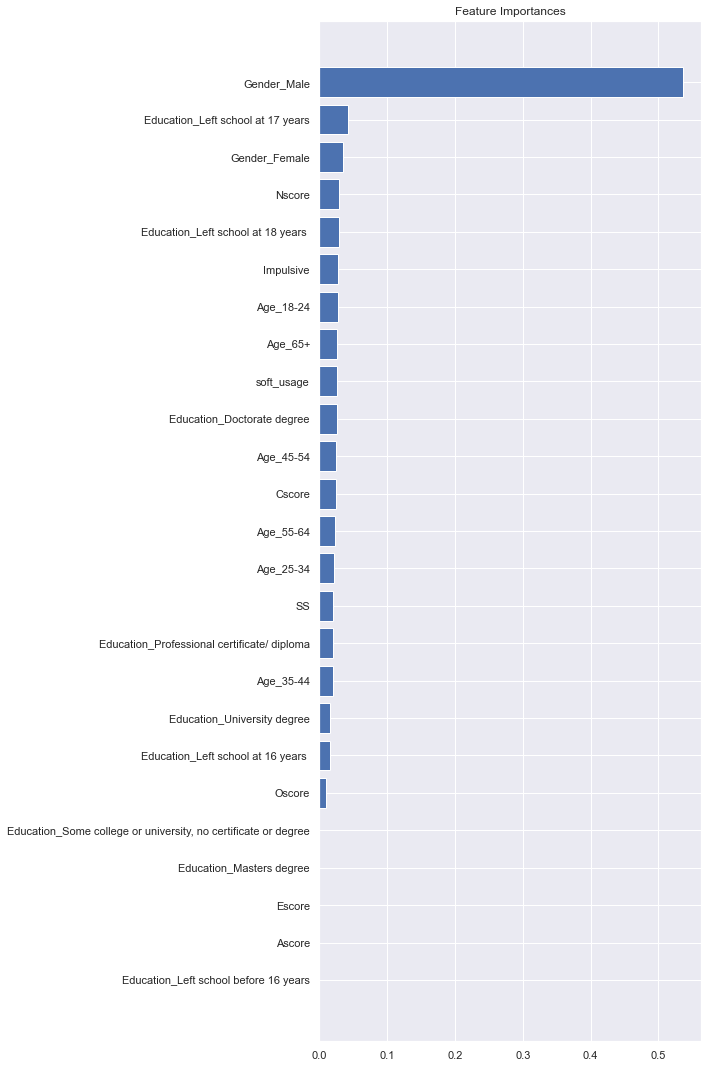


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       763
           1       0.73      0.78      0.75       644

    accuracy                           0.77      1407
   macro avg       0.76      0.77      0.76      1407
weighted avg       0.77      0.77      0.77      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       261
           1       0.67      0.74      0.70       209

    accuracy                           0.72       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       763
           1       0.71      0.87      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


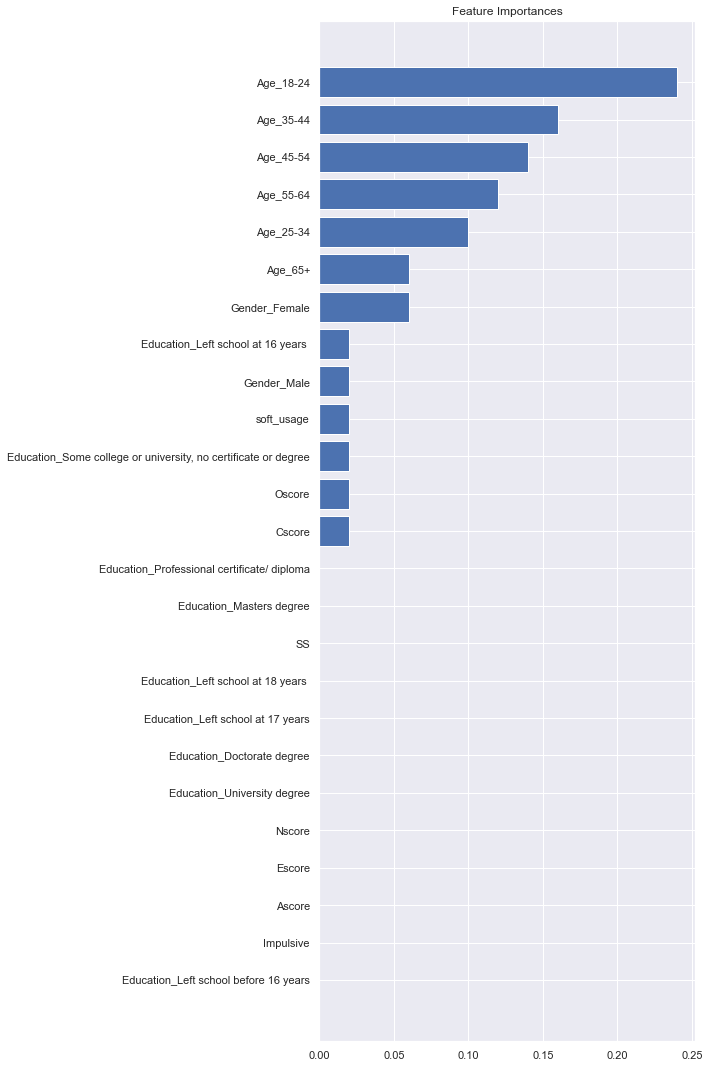


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       763
           1       0.66      0.66      0.66       644

    accuracy                           0.69      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.69      0.69      0.69      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       261
           1       0.61      0.68      0.65       209

    accuracy                           0.67       470
   macro avg       0.67      0.67      0.67       470
weighted avg       0.67      0.67      0.67       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


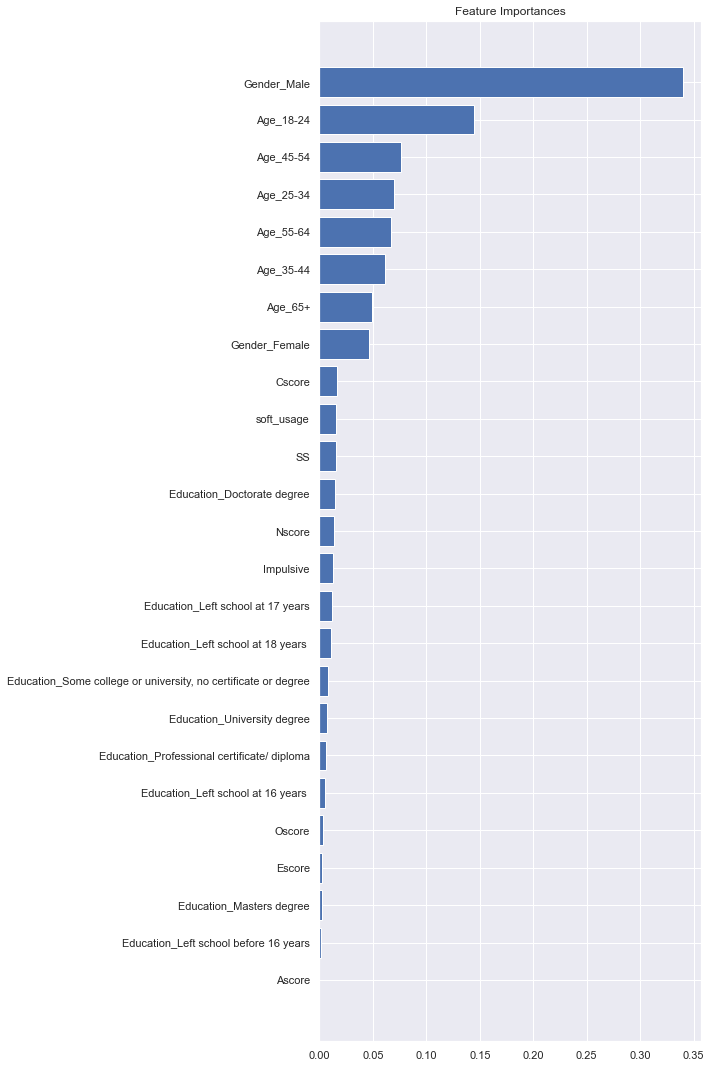

In [325]:
pipeline_test(X, y)

#### Randomforest

In [326]:
X = df_users.iloc[:,:10]
y = df_users.hard_usage

In [327]:
X['soft_usage'] = df_users.soft_usage

In [328]:
X = pd.get_dummies(X)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [330]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [331]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 500, max_depth=5, criterion='entropy')

In [332]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=42)

In [333]:
best_pred=rfc1.predict(X_test)

In [334]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       271
           1       0.69      0.86      0.76       199

    accuracy                           0.77       470
   macro avg       0.78      0.79      0.77       470
weighted avg       0.80      0.77      0.78       470



Text(0.5, 1.0, 'Confusion matrix')

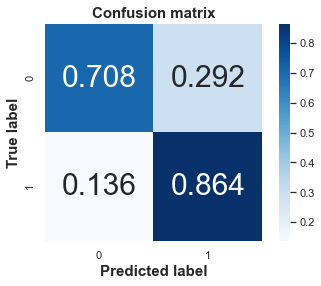

In [335]:
cm = confusion_matrix(y_test, rfc1.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

#### SVC

In [336]:
num_features = np.size(X_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [337]:
clf_svm = SVC(random_state=42, C=100, gamma=0.0001)
clf_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.0001, random_state=42)

Text(0.5, 1.0, 'Confusion matrix')

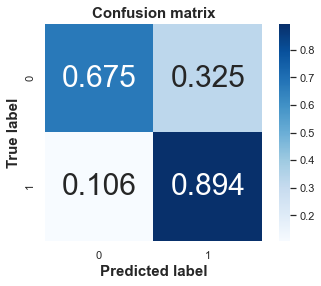

In [338]:
cm = confusion_matrix(y_test, clf_svm.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

In [339]:
y_pred = clf_svm.predict(X_test)

In [340]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7684368505340222

In [341]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7680851063829788

In [342]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       271
           1       0.67      0.89      0.77       199

    accuracy                           0.77       470
   macro avg       0.78      0.78      0.77       470
weighted avg       0.80      0.77      0.77       470



#### Xg boost

In [343]:
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],
     'learning_rate': [0.1, 0.01, 0.05, 0.5, 1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0, 10.0, 20, 100,],
     'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
 }

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', 
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 10.0, 'scale_pos_weight': 5}


In [344]:
clf_xgb = XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=1,
                        learn_rate=0.1,
                        max_depth=7,
                        reg_lambda=10,
                        scale_pos_weight=5,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.571855
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.669894
[2]	validation_0-aucpr:0.706939
[3]	validation_0-aucpr:0.712084
[4]	validation_0-aucpr:0.711356
[5]	validation_0-aucpr:0.711683
[6]	validation_0-aucpr:0.712453
[7]	validation_0-aucpr:0.702867
[8]	validation_0-aucpr:0.703129
[9]	validation_0-aucpr:0.710086
[10]	validation_0-aucpr:0.70894
[11]	validation_0-aucpr:0.708423
[12]	validation_0-aucpr:0.70819
[13]	validation_0-aucpr:0.708552
[14]	validation_0-aucpr:0.700693
[15]	validation_0-aucpr:0.700184
[16]	validation_0-aucpr:0.693432
Stopping. Best iteration:
[6]	validation_0-aucpr:0.712453



XGBClassifier(colsample_bytree=0.5, gamma=1, learn_rate=0.1, max_depth=7,
              reg_lambda=10, scale_pos_weight=5, seed=42, subsample=0.9)

In [345]:
y_pred = clf_xgb.predict(X_test)

In [346]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65       271
           1       0.58      0.92      0.71       199

    accuracy                           0.68       470
   macro avg       0.74      0.72      0.68       470
weighted avg       0.76      0.68      0.67       470



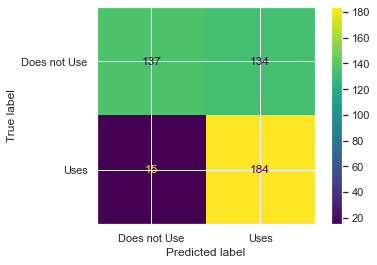

In [347]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=["Does not Use", "Uses"])

#### Logistic regression

In [348]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [349]:
y_pred=lr.predict(X_test)

In [350]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.79       271
           1       0.69      0.81      0.75       199

    accuracy                           0.77       470
   macro avg       0.77      0.77      0.77       470
weighted avg       0.78      0.77      0.77       470



Text(0.5, 1.0, 'Confusion matrix')

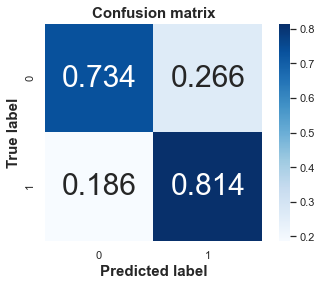

In [351]:
cm = confusion_matrix(y_test, lr.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

### Hard drug usage based on soft drug usage and gender 


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       763
           1       0.71      0.88      0.79       644

    accuracy                           0.78      1407
   macro avg       0.79      0.79      0.78      1407
weighted avg       0.80      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       261
           1       0.67      0.87      0.76       209

    accuracy                           0.75       470
   macro avg       0.77      0.76      0.75       470
weighted avg       0.78      0.75      0.75       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


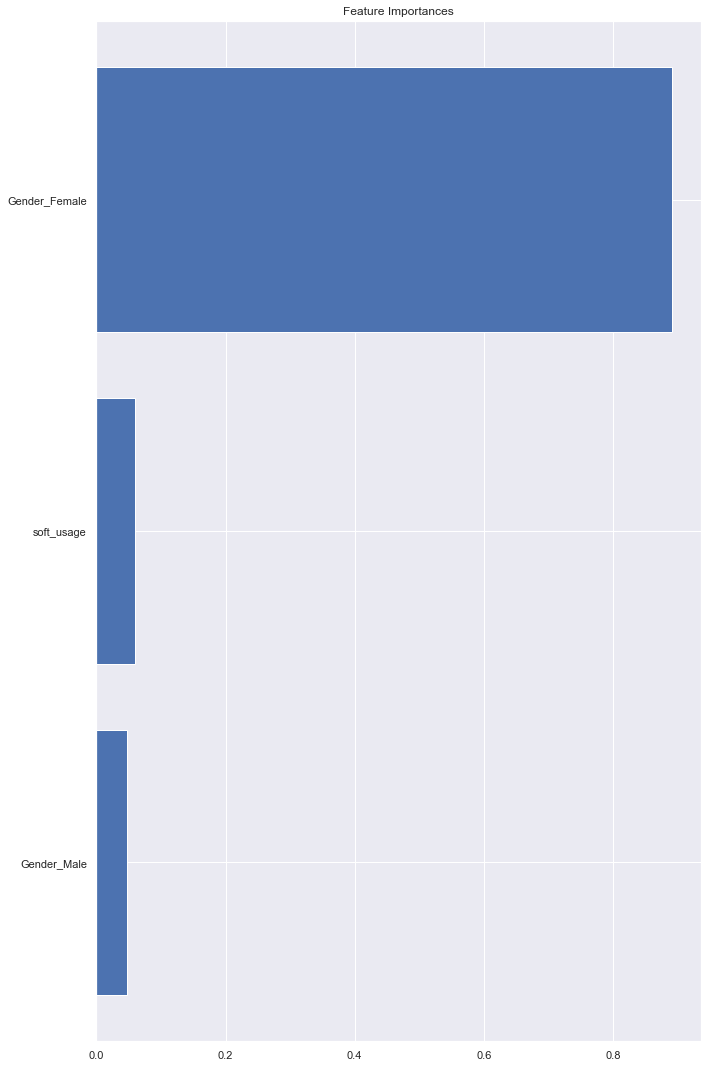


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       763
           1       0.71      0.88      0.79       644

    accuracy                           0.78      1407
   macro avg       0.79      0.79      0.78      1407
weighted avg       0.80      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       261
           1       0.67      0.87      0.76       209

    accuracy                           0.75       470
   macro avg       0.77      0.76      0.75       470
weighted avg       0.78      0.75      0.75       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


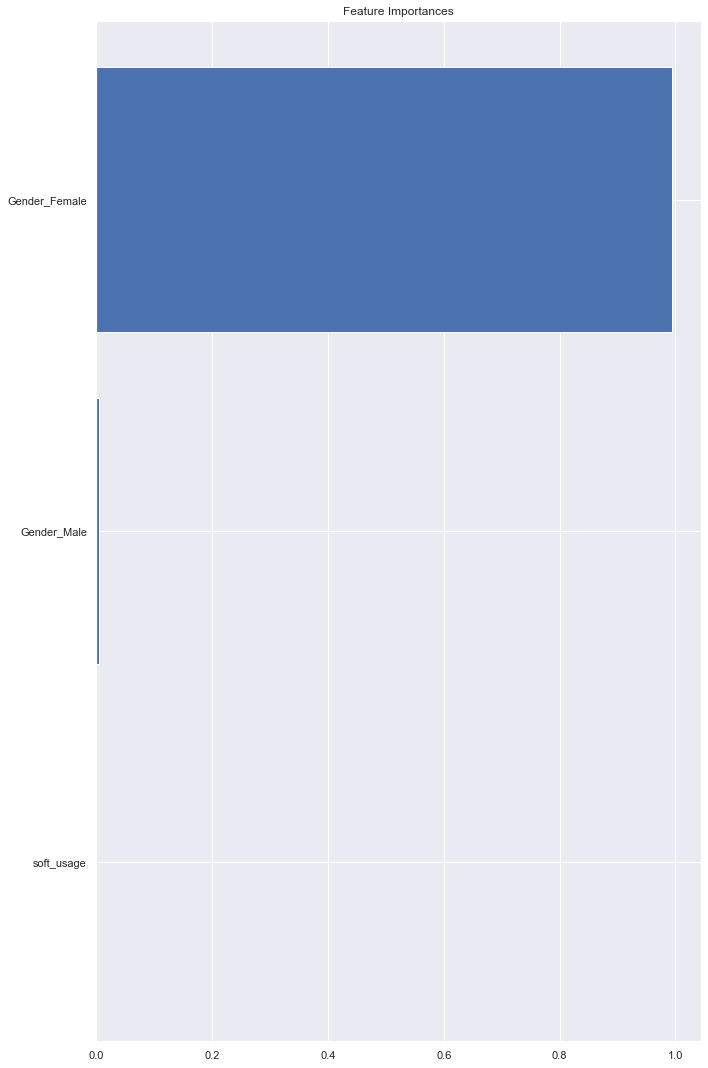


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       763
           1       0.71      0.75      0.73       644

    accuracy                           0.74      1407
   macro avg       0.74      0.75      0.74      1407
weighted avg       0.75      0.74      0.75      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       261
           1       0.67      0.87      0.76       209

    accuracy                           0.75       470
   macro avg       0.77      0.76      0.75       470
weighted avg       0.78      0.75      0.75       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       763
           1       0.71      0.88      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


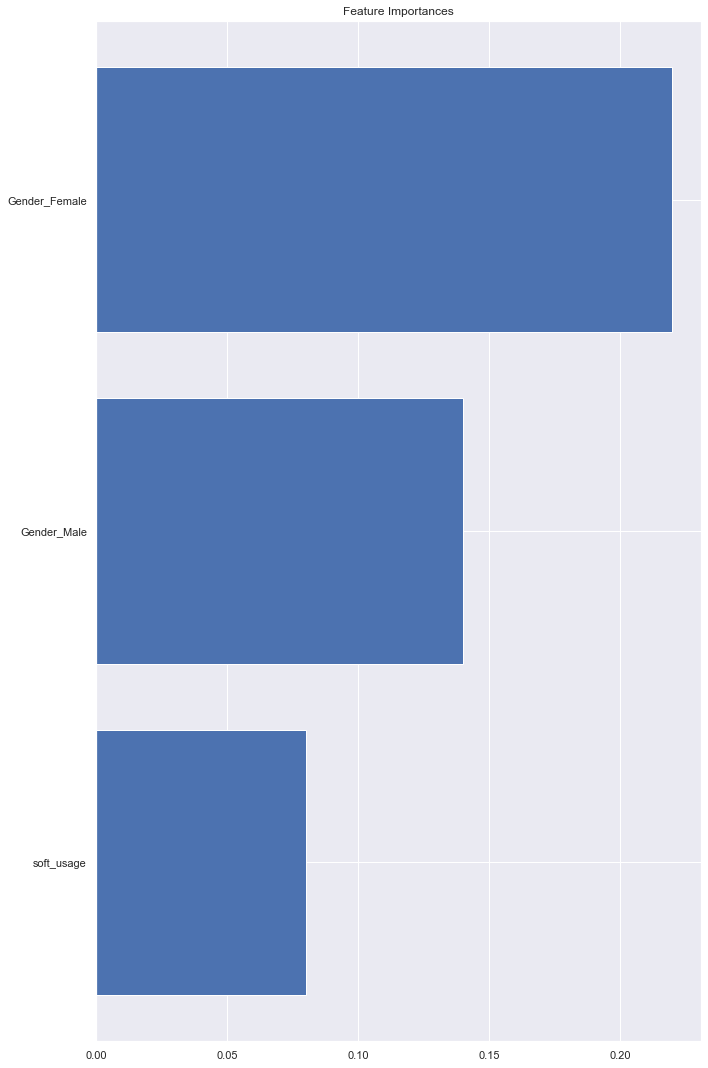


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       763
           1       0.71      0.88      0.79       644

    accuracy                           0.78      1407
   macro avg       0.79      0.79      0.78      1407
weighted avg       0.80      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       261
           1       0.67      0.87      0.76       209

    accuracy                           0.75       470
   macro avg       0.77      0.76      0.75       470
weighted avg       0.78      0.75      0.75       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


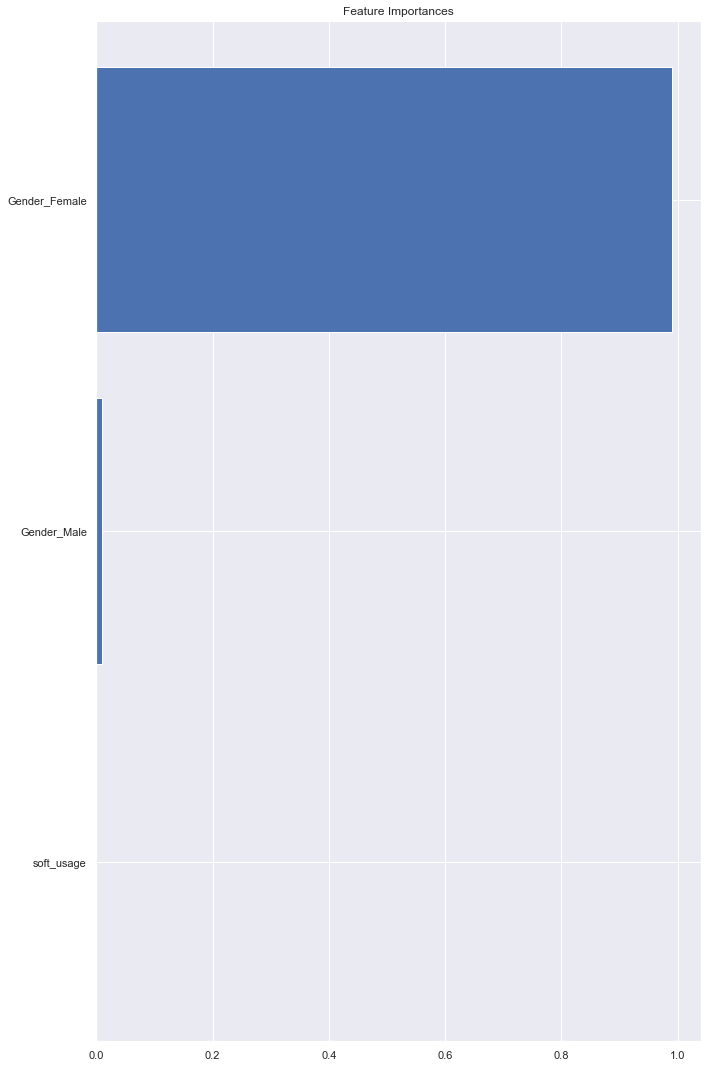

In [352]:
pipeline_test(df_users[["Gender", "soft_usage"]], df_users.hard_usage)

## Target: User of Soft Drugs 

### Based on demographic and psychometric 


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       611
           1       0.80      0.81      0.81       796

    accuracy                           0.78      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.78      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       200
           1       0.83      0.80      0.82       270

    accuracy                           0.80       470
   macro avg       0.79      0.79      0.79       470
weighted avg       0.80      0.80      0.80       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


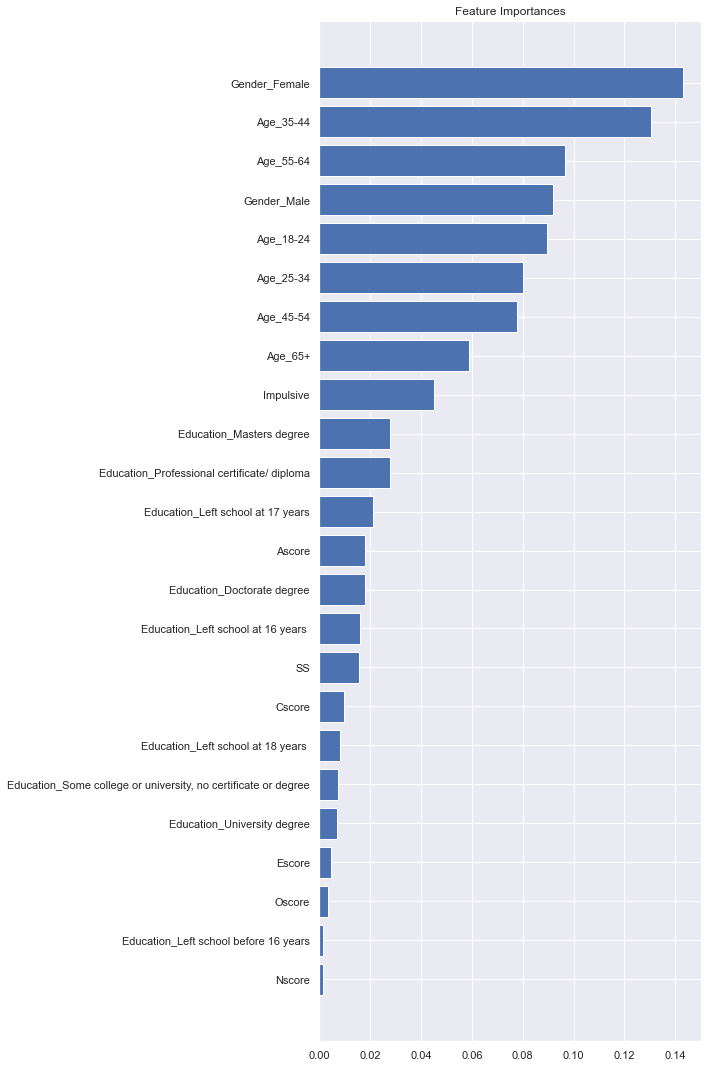


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       611
           1       0.82      0.80      0.81       796

    accuracy                           0.79      1407
   macro avg       0.79      0.79      0.79      1407
weighted avg       0.79      0.79      0.79      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       200
           1       0.83      0.81      0.82       270

    accuracy                           0.80       470
   macro avg       0.79      0.80      0.79       470
weighted avg       0.80      0.80      0.80       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


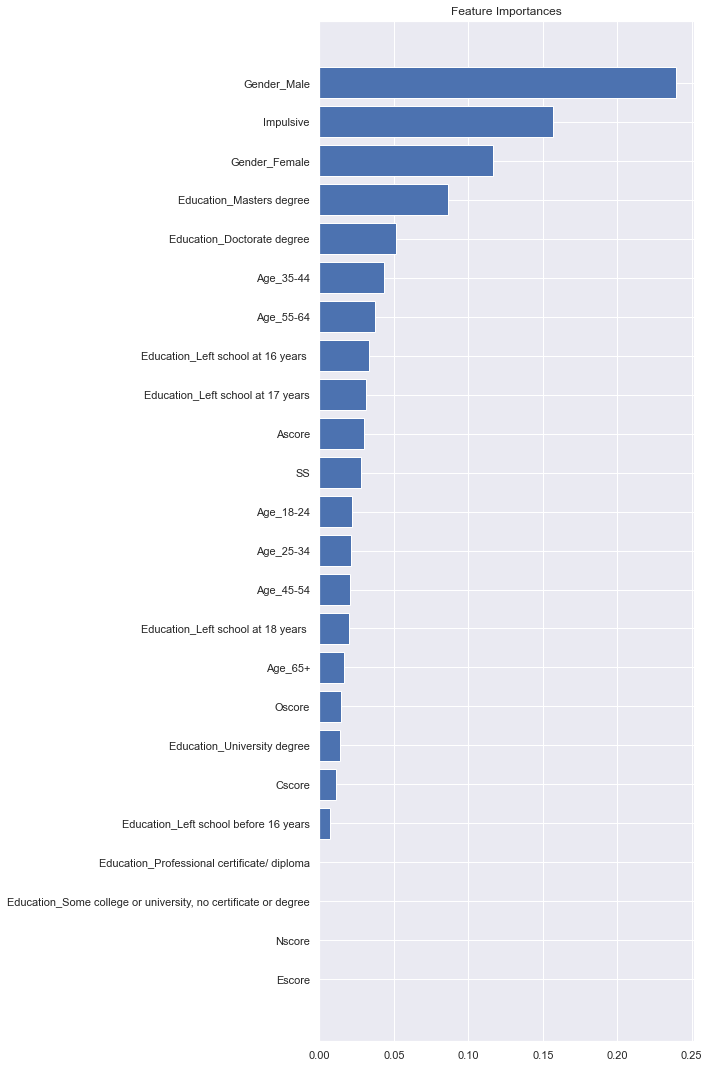


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       611
           1       0.80      0.81      0.81       796

    accuracy                           0.78      1407
   macro avg       0.77      0.77      0.77      1407
weighted avg       0.78      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       200
           1       0.82      0.82      0.82       270

    accuracy                           0.79       470
   macro avg       0.79      0.79      0.79       470
weighted avg       0.79      0.79      0.79       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       611
           1       0.83      0.82      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


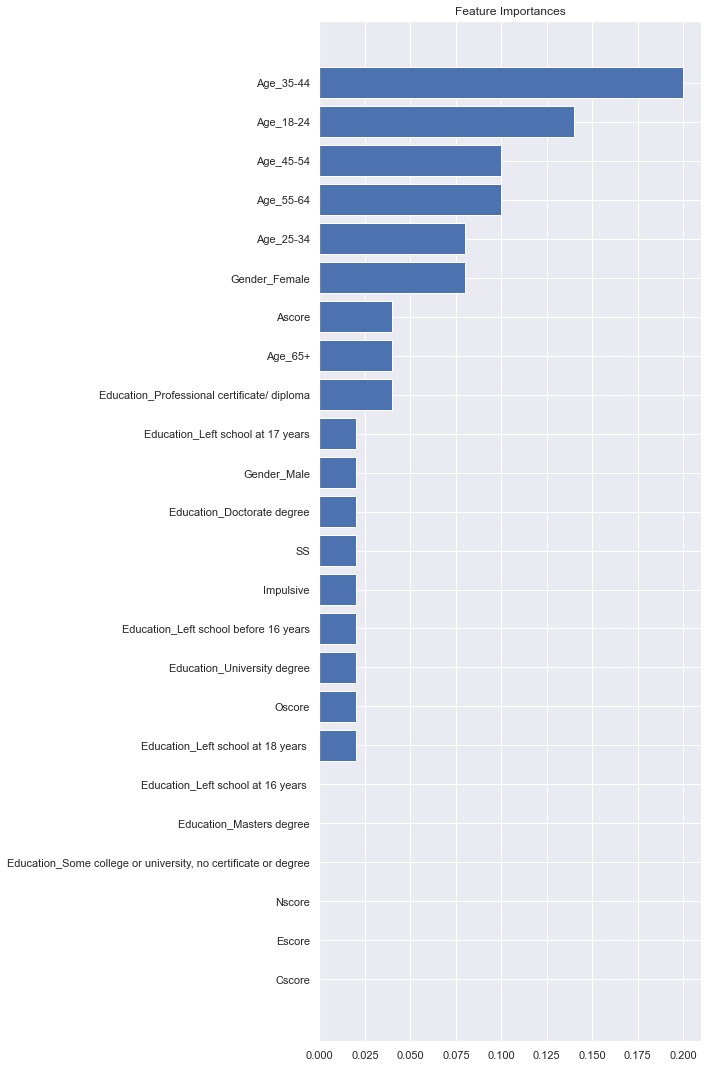


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       611
           1       0.74      0.73      0.74       796

    accuracy                           0.70      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.70      0.70      0.70      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       200
           1       0.75      0.71      0.73       270

    accuracy                           0.70       470
   macro avg       0.69      0.70      0.70       470
weighted avg       0.70      0.70      0.70       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


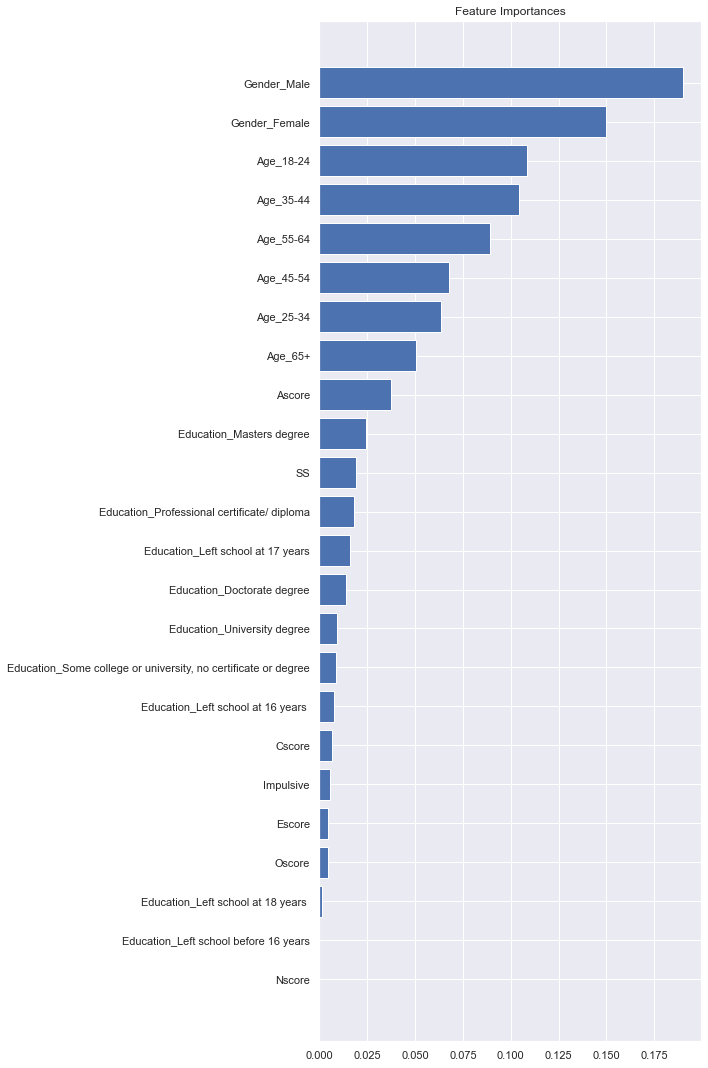

In [353]:
pipeline_test(df_users.iloc[:,:10], df_users.soft_usage)

## Target: User of any kind of drug (hard and soft) 

### Based on demographic and psychometric 


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       534
           1       0.84      0.85      0.85       873

    accuracy                           0.81      1407
   macro avg       0.80      0.80      0.80      1407
weighted avg       0.81      0.81      0.81      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       172
           1       0.84      0.87      0.85       298

    accuracy                           0.81       470
   macro avg       0.80      0.79      0.79       470
weighted avg       0.81      0.81      0.81       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


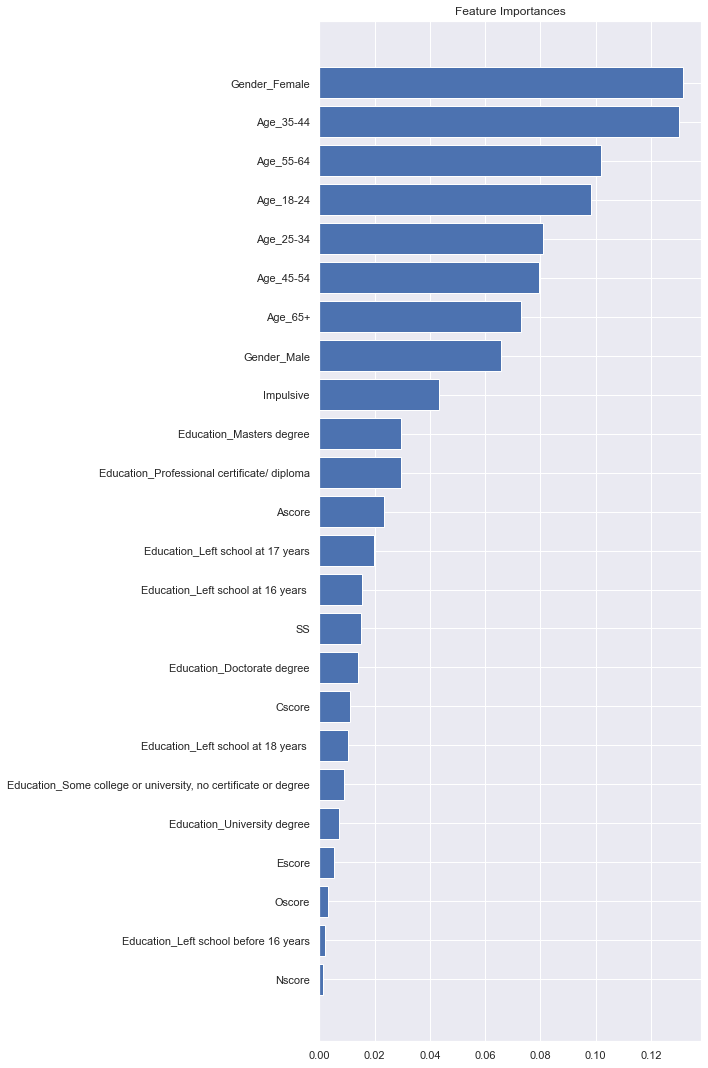


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       534
           1       0.84      0.83      0.83       873

    accuracy                           0.79      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.79      0.79      0.79      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       172
           1       0.85      0.85      0.85       298

    accuracy                           0.81       470
   macro avg       0.79      0.79      0.79       470
weighted avg       0.81      0.81      0.81       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


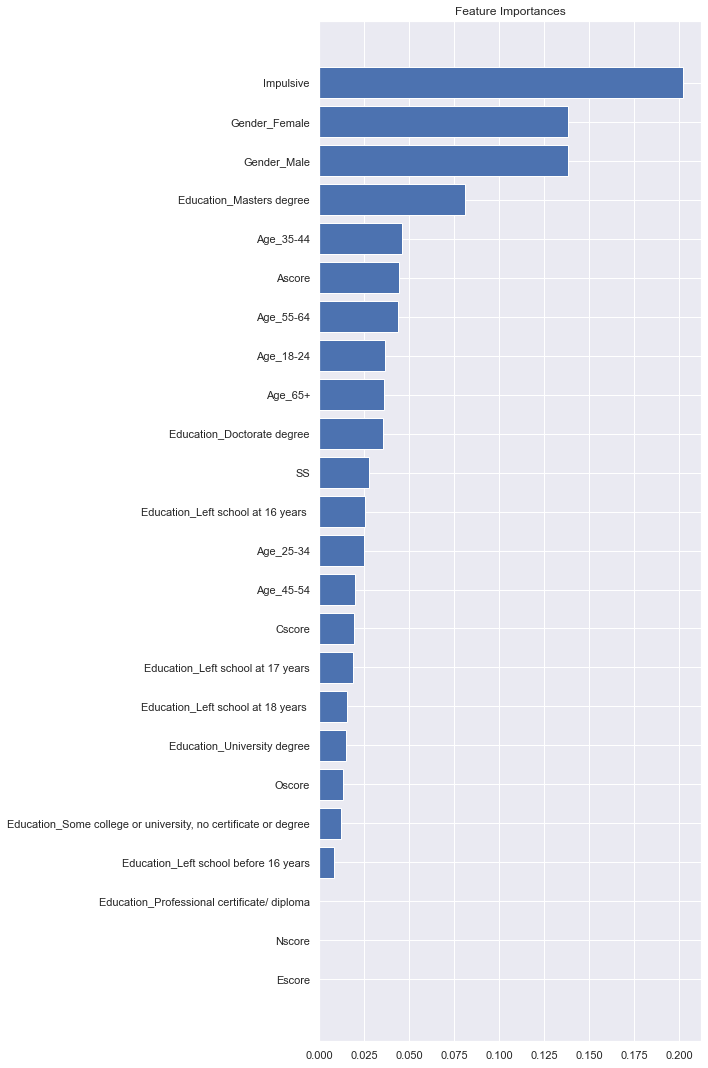


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       534
           1       0.82      0.83      0.82       873

    accuracy                           0.78      1407
   macro avg       0.77      0.77      0.77      1407
weighted avg       0.78      0.78      0.78      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       172
           1       0.85      0.83      0.84       298

    accuracy                           0.80       470
   macro avg       0.79      0.79      0.79       470
weighted avg       0.80      0.80      0.80       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       534
           1       0.85      0.84      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


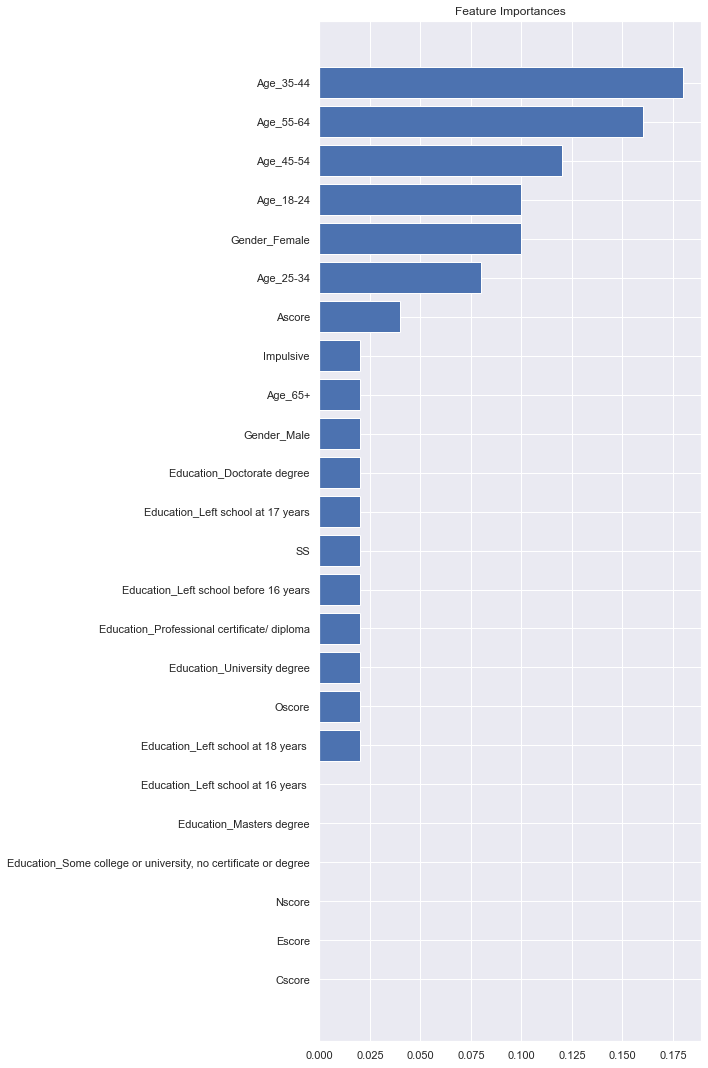


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       534
           1       0.78      0.79      0.79       873

    accuracy                           0.73      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.73      0.73      0.73      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       172
           1       0.80      0.77      0.79       298

    accuracy                           0.74       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.74      0.74      0.74       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


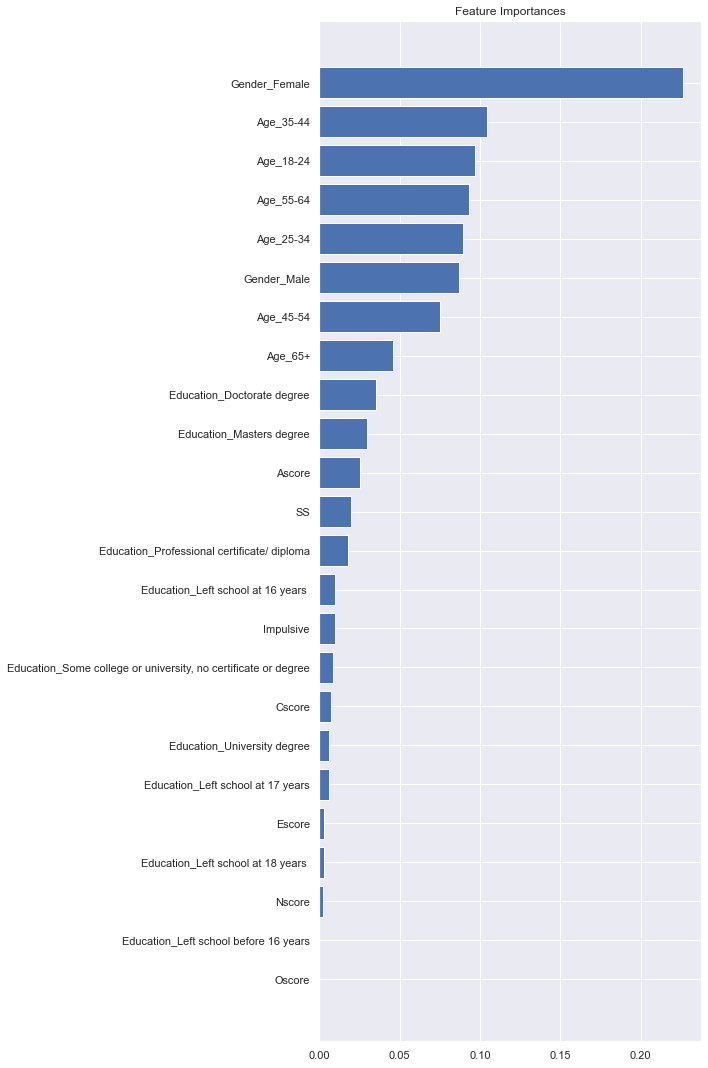

In [354]:
pipeline_test(df_users.iloc[:,:10], df_users.drug_usage)

## Target: Users of Cannabis, Shrooms and smoking Vs hard drugs


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       763
           1       0.71      0.75      0.73       644

    accuracy                           0.74      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.74      0.74      0.74      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       261
           1       0.68      0.77      0.72       209

    accuracy                           0.73       470
   macro avg       0.73      0.74      0.73       470
weighted avg       0.74      0.73      0.73       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


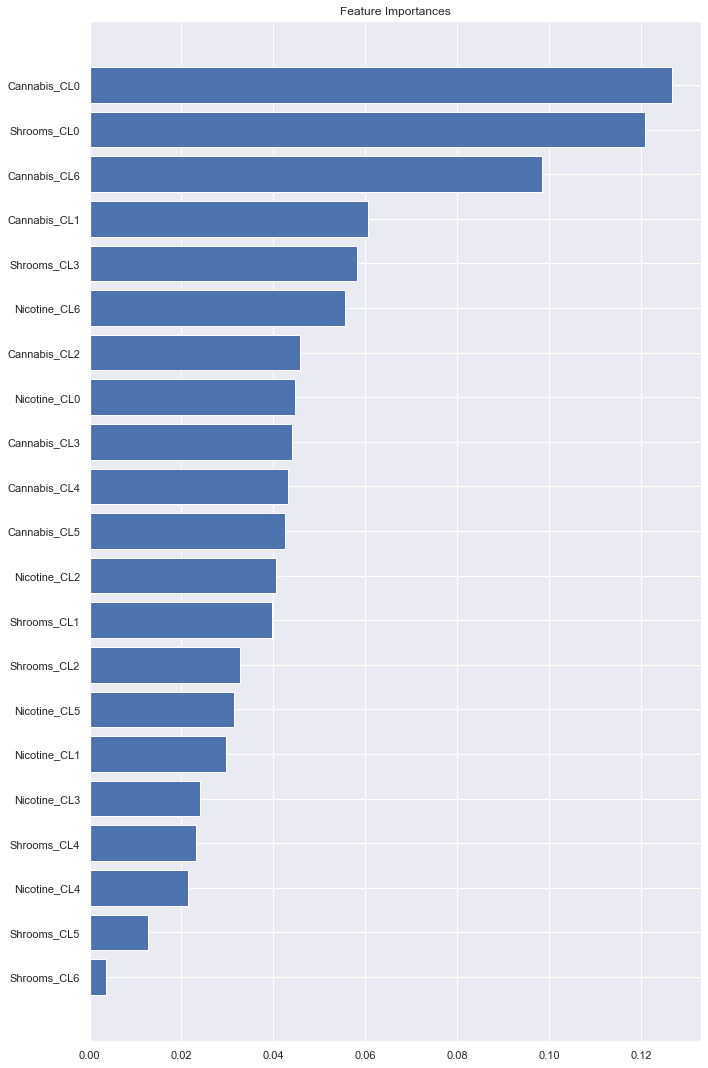


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       763
           1       0.72      0.77      0.75       644

    accuracy                           0.76      1407
   macro avg       0.76      0.76      0.76      1407
weighted avg       0.76      0.76      0.76      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       261
           1       0.68      0.78      0.73       209

    accuracy                           0.74       470
   macro avg       0.74      0.75      0.74       470
weighted avg       0.75      0.74      0.74       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


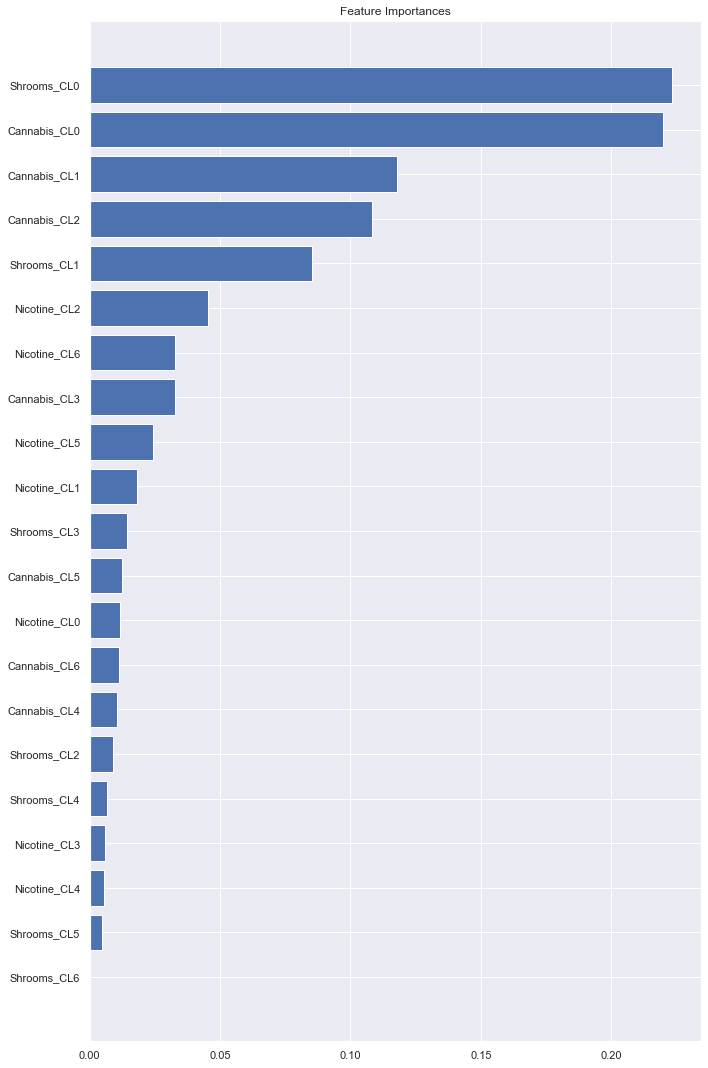


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       763
           1       0.73      0.75      0.74       644

    accuracy                           0.76      1407
   macro avg       0.76      0.76      0.76      1407
weighted avg       0.76      0.76      0.76      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       261
           1       0.67      0.72      0.69       209

    accuracy                           0.72       470
   macro avg       0.71      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       763
           1       0.71      0.81      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


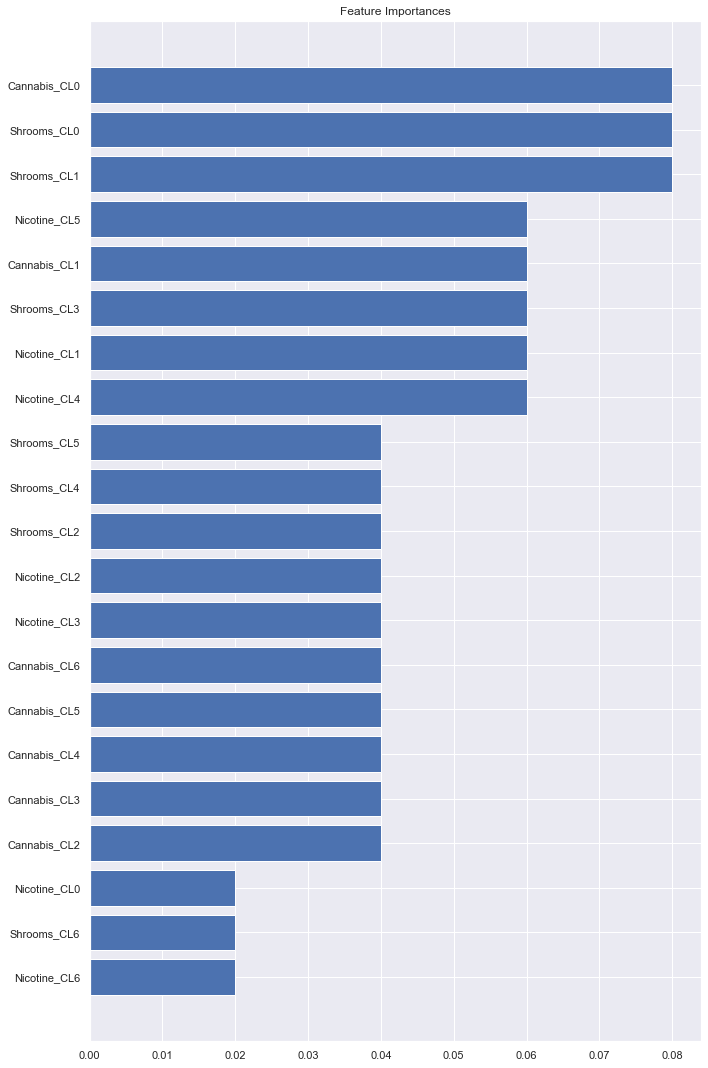


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       763
           1       0.72      0.70      0.71       644

    accuracy                           0.74      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.74      0.74      0.74      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       261
           1       0.67      0.72      0.70       209

    accuracy                           0.72       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


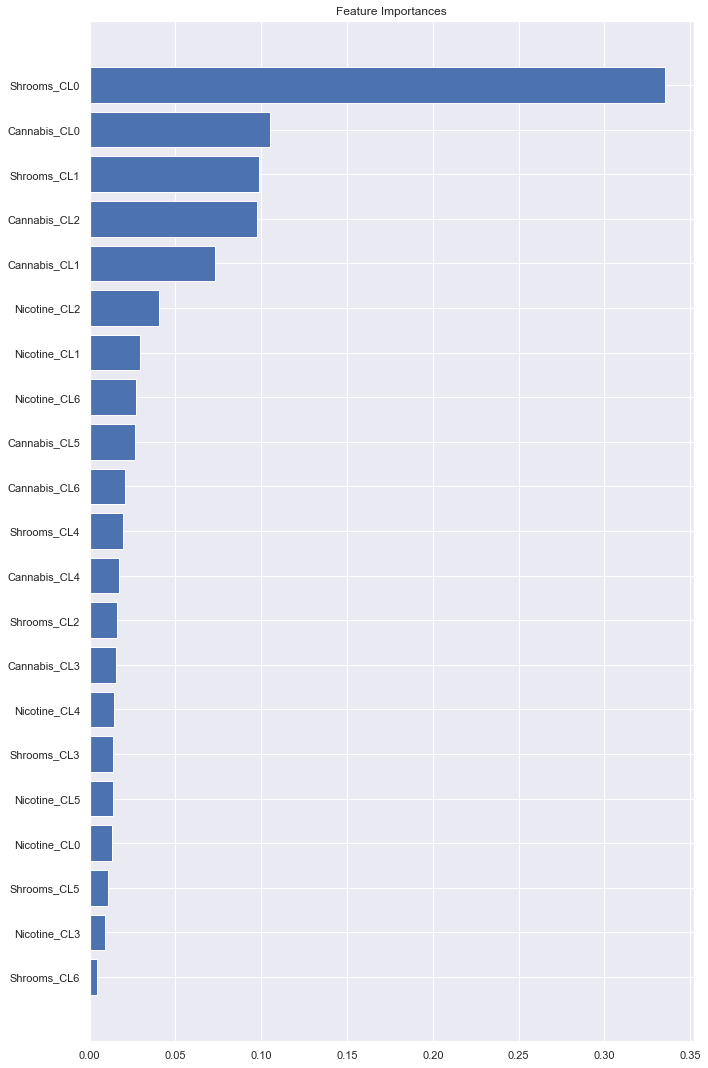

In [355]:
pipeline_test(df[['Cannabis','Shrooms','Nicotine']], df_users.hard_usage)

# Prediction modeling 

## Preprocessing 

In [356]:
# selecting the features and target (all general and psychometrics)
X = df_users.iloc[:,:10]
y = df_users.hard_usage

In [357]:
X = pd.get_dummies(X)

In [358]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Detailed Models

### K-Nearest-Neighbours

In [359]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [360]:
y_pred = knn.predict(X_test)

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       261
           1       0.62      0.54      0.58       209

    accuracy                           0.65       470
   macro avg       0.64      0.64      0.64       470
weighted avg       0.65      0.65      0.65       470



### Random Forest

#### Baseline Random Forest

In [362]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [363]:
y_pred = rfc.predict(X_test)

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       261
           1       0.68      0.57      0.62       209

    accuracy                           0.69       470
   macro avg       0.69      0.68      0.68       470
weighted avg       0.69      0.69      0.69       470



#### Optimized Random Forest 

For shake of computation time, we wont run our grid search twice for the rest of the notebook

In [365]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [366]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 500, max_depth=7, criterion='entropy')

In [367]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=42)

In [368]:
best_pred=rfc1.predict(X_test)

In [369]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       261
           1       0.69      0.69      0.69       209

    accuracy                           0.72       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470



In [370]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_pred, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_pred)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_pred, beta = 0.5)))
print(rfc1)

Unoptimized model
------
Accuracy score on testing data: 0.6894
F-score on testing data: 0.6543

Optimized Model
------
Final accuracy score on the testing data: 0.7213
Final F-score on the testing data: 0.6864
RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=42)


### SVM 

#### Baseline SVM 

In [371]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train) 

SVC()

In [372]:
y_pred = svm.predict(X_test)

In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       261
           1       0.68      0.56      0.62       209

    accuracy                           0.69       470
   macro avg       0.69      0.68      0.68       470
weighted avg       0.69      0.69      0.68       470



#### Optimized SVM 

In [374]:
num_features = np.size(X_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [375]:
clf_svm = SVC(random_state=42, C=100, gamma=0.0001)
clf_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.0001, random_state=42)

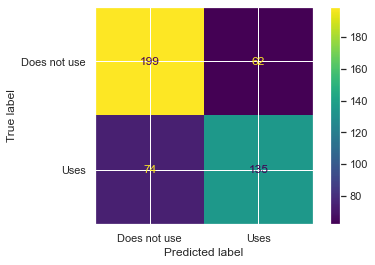

In [376]:
plot_confusion_matrix(clf_svm, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Does not use", "Uses"]);

In [377]:
y_pred = clf_svm.predict(X_test)

In [378]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7096132716401952

In [379]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7106382978723405

### XGBoost 

#### Baseline XGBoost 

In [380]:
# instanciate classifier, fit model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [381]:
y_pred = xgb.predict(X_test)

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       261
           1       0.67      0.67      0.67       209

    accuracy                           0.71       470
   macro avg       0.70      0.70      0.70       470
weighted avg       0.71      0.71      0.71       470



#### Optimized XGBoost 

In [383]:
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],
     'learning_rate': [0.1, 0.01, 0.05, 0.5, 1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0, 10.0, 20, 100,],
     'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
 }

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', 
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.5, 'max_depth': 3, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [384]:
clf_xgb = XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0,
                        learn_rate=0.5,
                        max_depth=6,
                        reg_lambda=100,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.621466
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.67161
[2]	validation_0-aucpr:0.672141
[3]	validation_0-aucpr:0.679707
[4]	validation_0-aucpr:0.679003
[5]	validation_0-aucpr:0.682388
[6]	validation_0-aucpr:0.687238
[7]	validation_0-aucpr:0.683566
[8]	validation_0-aucpr:0.689089
[9]	validation_0-aucpr:0.704049
[10]	validation_0-aucpr:0.699914
[11]	validation_0-aucpr:0.697144
[12]	validation_0-aucpr:0.696279
[13]	validation_0-aucpr:0.69378
[14]	validation_0-aucpr:0.697674
[15]	validation_0-aucpr:0.705934
[16]	validation_0-aucpr:0.710554
[17]	validation_0-aucpr:0.711262
[18]	validation_0-aucpr:0.712963
[19]	validation_0-aucpr:0.711343
[20]	validation_0-aucpr:0.71447
[21]	validation_0-aucpr:0.717539
[22]	validation_0-aucpr:0.716034
[23]	validation_0-aucpr:0.71208
[24]	validation_0-aucpr:0.712771
[25]	validation_0-aucpr:0.711389
[26]	validation_0-aucpr:0.712521
[27]	validation_0-aucpr:0.712579
[28]	validation_0-aucpr:

XGBClassifier(colsample_bytree=0.5, learn_rate=0.5, max_depth=6, reg_lambda=100,
              seed=42, subsample=0.9)

In [385]:
y_pred = clf_xgb.predict(X_test)

In [386]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       261
           1       0.72      0.69      0.70       209

    accuracy                           0.74       470
   macro avg       0.74      0.74      0.74       470
weighted avg       0.74      0.74      0.74       470



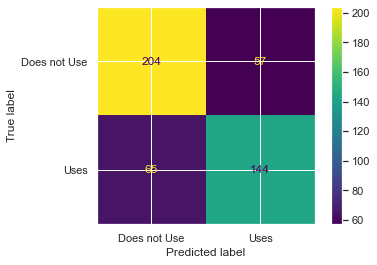

In [387]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=["Does not Use", "Uses"])

### Adaboost

#### Baseline Adaboost 

In [388]:
ada = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
ada.fit(X_train, y_train)

# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

AdaBoostClassifier()

In [389]:
y_pred = ada.predict(X_test)

In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       261
           1       0.69      0.62      0.65       209

    accuracy                           0.71       470
   macro avg       0.70      0.70      0.70       470
weighted avg       0.71      0.71      0.70       470



#### Optimized Adaboost

In [391]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

# TODO: Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) 

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[1000],                
              'learning_rate':[0.1, 0.5, 1,],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6426
F-score on testing data: 0.5981

Optimized Model
------
Final accuracy score on the testing data: 0.7043
Final F-score on the testing data: 0.6704
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=1000)


### Logistics Regression 

In [392]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [393]:
y_pred=lr.predict(X_test)

In [394]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       261
           1       0.69      0.67      0.68       209

    accuracy                           0.72       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470



### Decision Tree 

#### Baseline Decision Tree 

In [395]:
tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

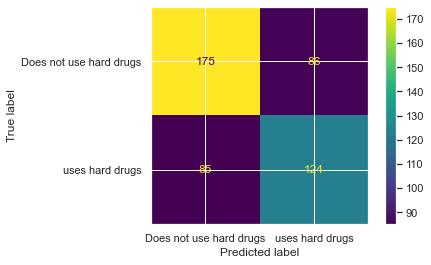

In [396]:
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Does not use hard drugs', 'uses hard drugs']);

In [397]:
print(f'Decision tree has { tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 655 nodes with maximum depth 21.


In [398]:
y_pred = tree.predict(X_test)

In [399]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       261
           1       0.59      0.59      0.59       209

    accuracy                           0.64       470
   macro avg       0.63      0.63      0.63       470
weighted avg       0.64      0.64      0.64       470



#### Optimized Decision Tree 

In [400]:
path = tree.cost_complexity_pruning_path(X_train, y_train) # determin values fo aplha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

#now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(tree)

In [401]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

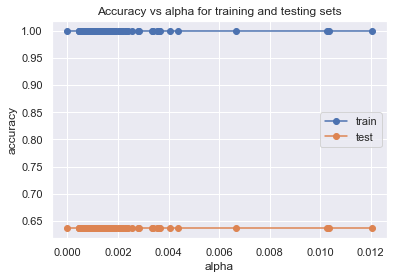

In [402]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

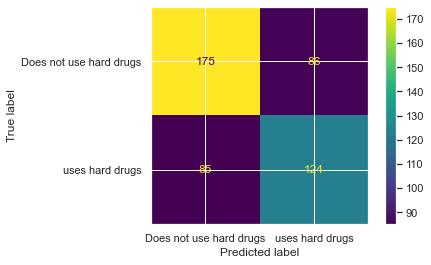

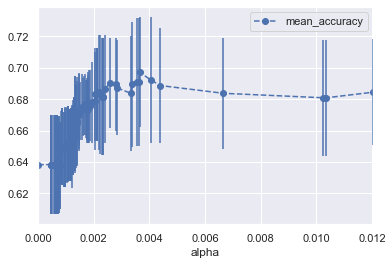

In [403]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores= cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

Alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Does not use hard drugs', 'uses hard drugs']);
Alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o',linestyle='--');

In [404]:
Ideal_ccp_alpha= Alpha_results[(Alpha_results['alpha'] >0.0025) & (Alpha_results['alpha'] <0.0035)]

In [405]:
Ideal_ccp_alpha.head(5)

alpha  mean_accuracy       std
132  0.002573       0.690104  0.028745
133  0.002784       0.689397  0.029497
134  0.002841       0.687262  0.030407
135  0.003332       0.683721  0.036749
136  0.003382       0.689415  0.039768

In [406]:
Clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.002573)
Clf_dt_pruned = Clf_dt_pruned.fit(X_train, y_train)

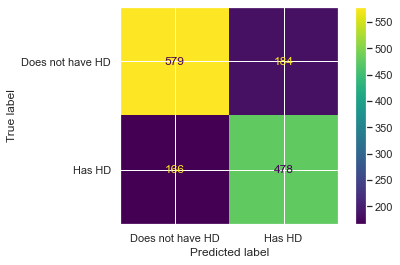

In [407]:
plot_confusion_matrix(Clf_dt_pruned, X_train, y_train, display_labels=['Does not have HD', 'Has HD'])

In [408]:
y_pred = Clf_dt_pruned.predict(X_test)

In [409]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       261
           1       0.63      0.72      0.67       209

    accuracy                           0.69       470
   macro avg       0.69      0.69      0.69       470
weighted avg       0.70      0.69      0.69       470



### Stacking Classifier

In [410]:
estimators = [('rf', RandomForestClassifier(n_estimators=200, random_state=42)), 
              ('svr', make_pipeline(StandardScaler(), SVC(random_state=42))),
              ('lr', LogisticRegression(max_iter=1000))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(random_state=42))])),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

In [411]:
y_pred = clf.predict(X_test)

In [412]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       261
           1       0.69      0.69      0.69       209

    accuracy                           0.73       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.73      0.73      0.73       470



### Overall comparison of classifiers 

In [413]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [414]:
# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 500, max_depth=7, criterion='entropy')
clf_B = LogisticRegression(random_state = 101)
clf_C = XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0,
                        learn_rate=0.5,
                        max_depth=6,
                        reg_lambda=100,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RandomForestClassifier trained on 14 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RandomForestClassifier trained on 141 samples.


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anac

RandomForestClassifier trained on 1407 samples.
LogisticRegression trained on 14 samples.
LogisticRegression trained on 141 samples.
LogisticRegression trained on 1407 samples.
XGBClassifier trained on 14 samples.
XGBClassifier trained on 141 samples.
XGBClassifier trained on 1407 samples.


In [415]:
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (12,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [416]:
population = len(df_users)
users = len(df_users[df_users['hard_usage'] == 1])
non_users = len(df_users[df_users['hard_usage'] == 0])
users_percentage = 100 * users / population

users_percentage

45.44485881726159

In [417]:
# TODO: Calculate accuracy
accuracy = users / population

# Calculating precision
precision = users / (users + non_users)

#Calculating recall
recall = users / (users + 0)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.4544, F-score: 0.5101]


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


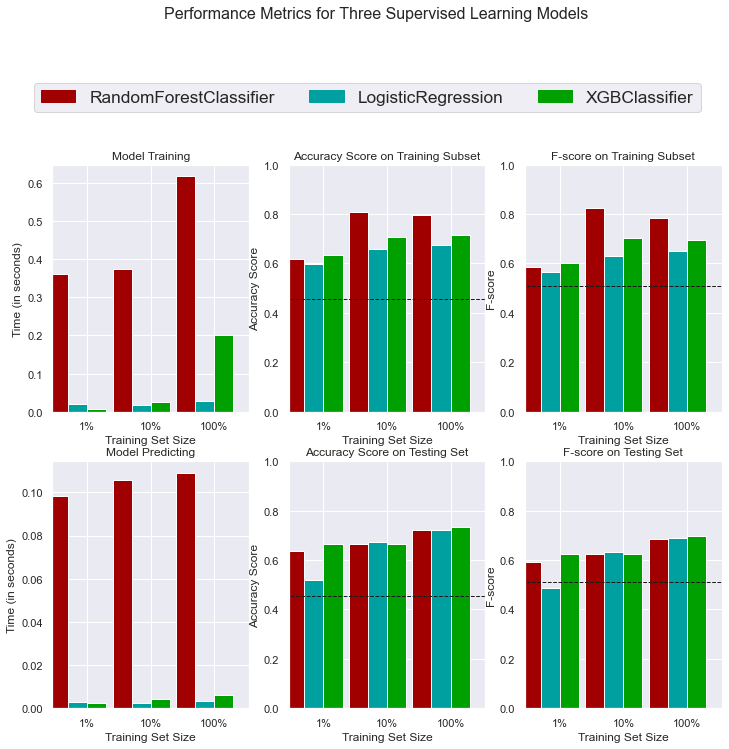

In [418]:
evaluate(results, accuracy, fscore)

In [419]:
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

RandomForestClassifier


1%       10%      100%
acc_test    0.636170  0.665957  0.721277
acc_train   0.620000  0.810000  0.796667
f_test      0.593220  0.624250  0.686368
f_train     0.586510  0.824742  0.785498
pred_time   0.098544  0.105587  0.109001
train_time  0.361504  0.374866  0.616638

LogisticRegression


1%       10%      100%
acc_test    0.519149  0.674468  0.723404
acc_train   0.596667  0.660000  0.676667
f_test      0.488574  0.634218  0.689990
f_train     0.564067  0.631673  0.651125
pred_time   0.002719  0.002585  0.003383
train_time  0.021036  0.018890  0.028424

XGBClassifier


1%       10%      100%
acc_test    0.665957  0.665957  0.731915
acc_train   0.633333  0.706667  0.716667
f_test      0.624376  0.624204  0.695853
f_train     0.600000  0.702811  0.695719
pred_time   0.002422  0.004082  0.005919
train_time  0.007165  0.026514  0.199822

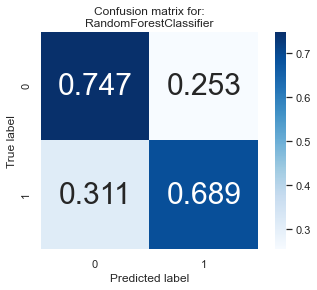

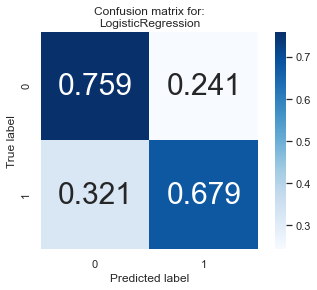

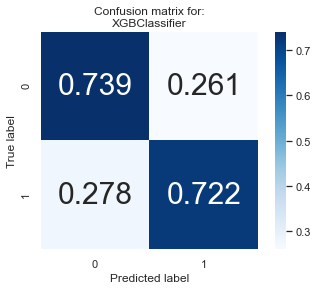

In [420]:
for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

In [421]:
df_users.to_csv("data/final.csv", index=False)

# Targeting our favorite personality treats

In [422]:
ndf = df_users.copy()
ndf['user_kat'] = 0

In [423]:
ndf.loc[ndf.hard_usage == 1, 'user_kat'] = 'hard_user'
ndf.loc[(ndf.hard_usage == 0) & (ndf.soft_usage == 1), 'user_kat'] = 'soft_user'
ndf.loc[ndf.drug_usage == 0, 'user_kat'] = 'no_user'

In [424]:
ndf2 = ndf[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'user_kat']]

In [425]:
scores = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',]
demo = ['Age', 'Gender', 'Education']

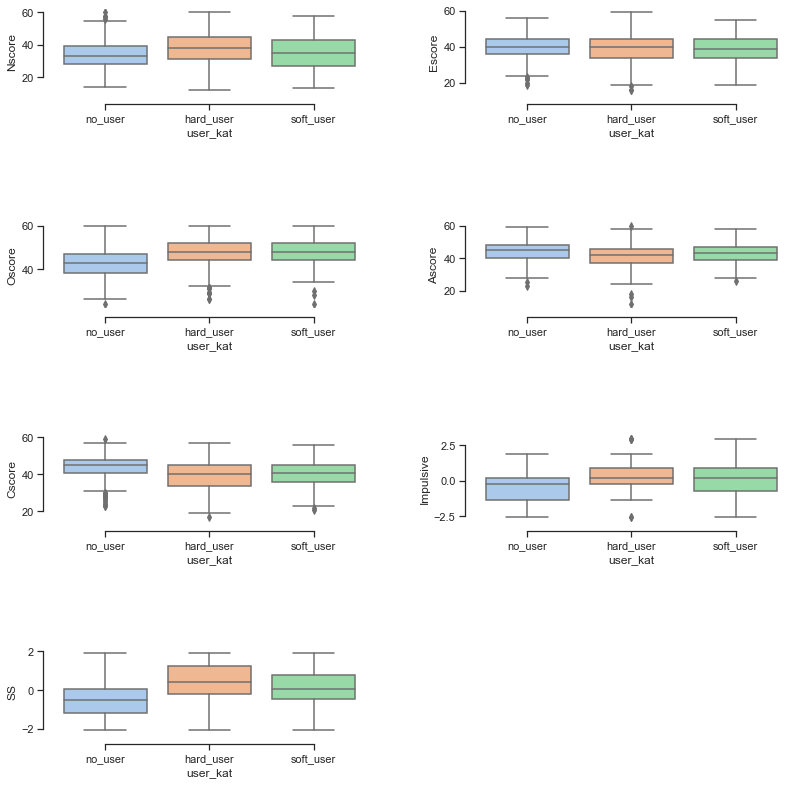

In [426]:
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(12,12))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.5,
                    wspace=0.35)



for index, feature in enumerate(ndf[scores]):
    plt.subplot(4, 2, index+1)
    sns.boxplot(x='user_kat', y=feature, data=ndf)
    sns.despine(offset=10, trim=True)
plt.savefig("figures/boxplots.png")

In [427]:
ndf3 = ndf.query(
    'Oscore > Oscore.mean() & SS > SS.mean() & Impulsive > Impulsive.mean() & Cscore < Cscore.mean()')


In [428]:
ndf3.shape

(300, 50)

In [429]:
pipeline_test(pd.get_dummies(ndf3[ list(ndf3.loc[:,demo]) + list(df.loc[:,scores]) + ['soft_usage'] ], drop_first=True), ndf3.hard_usage)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.55      0.18      0.27        60
           1       0.76      0.95      0.84       165

    accuracy                           0.74       225
   macro avg       0.66      0.56      0.56       225
weighted avg       0.70      0.74      0.69       225


Results on test data:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38        18
           1       0.80      0.86      0.83        57

    accuracy                           0.73        75
   macro avg       0.62      0.60      0.60        75
weighted avg       0.71      0.73      0.72        75


Did not work!

<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.52      0.37      0.43        60
           1       0.79      0.88      0.83

In [430]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,15],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [1,2,5,10]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [431]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 100, max_depth=5, criterion='gini')

In [432]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [433]:
best_pred=rfc1.predict(X_test)

In [434]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       261
           1       0.70      0.68      0.69       209

    accuracy                           0.73       470
   macro avg       0.73      0.73      0.73       470
weighted avg       0.73      0.73      0.73       470



Text(0.5, 1.0, 'Confusion matrix')

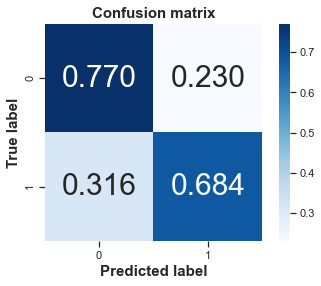

In [435]:
cm = confusion_matrix(y_test, rfc1.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

#### SVC

In [436]:
num_features = np.size(X_train, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [437]:
clf_svm = SVC(random_state=42, C=1, gamma=0.0001)
clf_svm.fit(X_train, y_train)

SVC(C=1, gamma=0.0001, random_state=42)

Text(0.5, 1.0, 'Confusion matrix')

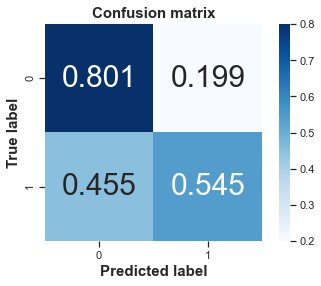

In [438]:
cm = confusion_matrix(y_test, clf_svm.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

In [439]:
y_pred = clf_svm.predict(X_test)

In [440]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6812038410845414

In [441]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6872340425531915

In [442]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       261
           1       0.69      0.55      0.61       209

    accuracy                           0.69       470
   macro avg       0.69      0.67      0.67       470
weighted avg       0.69      0.69      0.68       470



#### Xg boost

In [443]:
param_grid = {
     'max_depth': [3, 4, 5, 6, 7],
     'learning_rate': [0.1, 0.01, 0.05, 0.5, 1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0, 10.0, 20, 100,],
     'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
 }

optimal_params = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', 
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.5, 'max_depth': 3, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [444]:
clf_xgb = XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0.25,
                        learn_rate=0.5,
                        max_depth=5,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.665935
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.672478
[2]	validation_0-aucpr:0.665025
[3]	validation_0-aucpr:0.694502
[4]	validation_0-aucpr:0.689815
[5]	validation_0-aucpr:0.687153
[6]	validation_0-aucpr:0.695123
[7]	validation_0-aucpr:0.699243
[8]	validation_0-aucpr:0.704452
[9]	validation_0-aucpr:0.706805
[10]	validation_0-aucpr:0.704302
[11]	validation_0-aucpr:0.70276
[12]	validation_0-aucpr:0.701136
[13]	validation_0-aucpr:0.701419
[14]	validation_0-aucpr:0.700159
[15]	validation_0-aucpr:0.701163
[16]	validation_0-aucpr:0.698928
[17]	validation_0-aucpr:0.696632
[18]	validation_0-aucpr:0.696431
[19]	validation_0-aucpr:0.698247
Stopping. Best iteration:
[9]	validation_0-aucpr:0.706805



XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.5, max_depth=5,
              seed=42, subsample=0.9)

In [445]:
y_pred = clf_xgb.predict(X_test)

In [446]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       261
           1       0.71      0.67      0.69       209

    accuracy                           0.73       470
   macro avg       0.73      0.73      0.73       470
weighted avg       0.73      0.73      0.73       470



Text(0.5, 1.0, 'Confusion matrix')

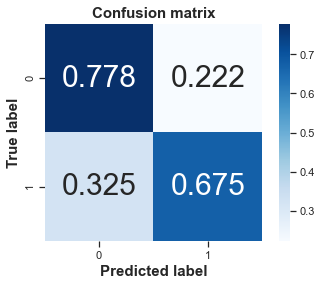

In [447]:
cm = confusion_matrix(y_test, clf_xgb.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

#### Logistic regression

In [448]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [449]:
y_pred=lr.predict(X_test)

In [450]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       261
           1       0.69      0.67      0.68       209

    accuracy                           0.72       470
   macro avg       0.72      0.72      0.72       470
weighted avg       0.72      0.72      0.72       470



Text(0.5, 1.0, 'Confusion matrix')

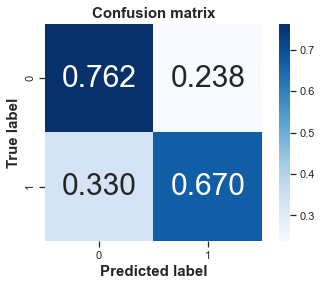

In [451]:
cm = confusion_matrix(y_test, lr.predict(X_test),)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
# view with a heatmap
#plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')


plt.ylabel('True label', fontsize=15, fontweight="bold")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold")
plt.title('Confusion matrix', fontsize=15, fontweight="bold")

# Investigating more the Regularity of using

In [452]:
# last usage for the group with higher personality trait risks
ndf3["soft_last_use"] = ndf3[soft_col].max(axis=1)
ndf3["hard_last_use"] = ndf3[hard_col].max(axis=1)

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [453]:
ndf3[['soft_last_use', 'hard_last_use']].head()

soft_last_use  hard_last_use
11              4              2
12              3              4
27              6              2
34              2              2
58              5              5

In [454]:
# last usage for all individuals
ndf["soft_last_use"] = ndf[soft_col].max(axis=1)
ndf["hard_last_use"] = ndf[hard_col].max(axis=1)
ndf[['soft_last_use', 'hard_last_use']].head()

soft_last_use  hard_last_use
0              0              2
1              4              3
2              3              0
3              2              3
4              3              1

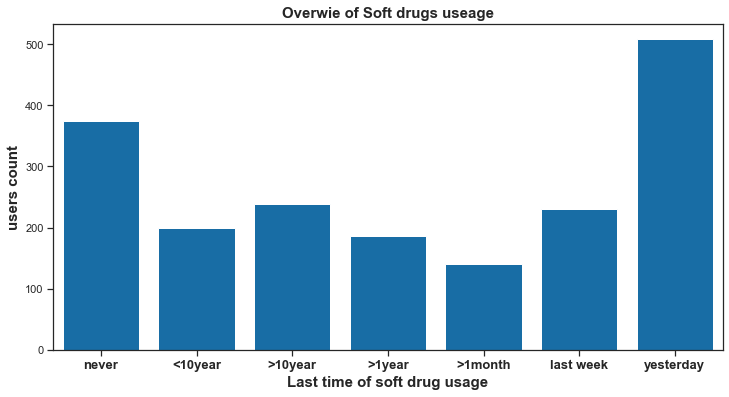

In [455]:
xticks = ['never', '<10year', '>10year','>1year','>1month', 'last week', 'yesterday']
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'soft_last_use', data = ndf, color='#0072BD')
ax.set_title("Overwie of Soft drugs useage", fontsize=15, fontweight="bold")
ax.set_ylabel('users count', fontsize=15, fontweight="bold")
ax.set_xlabel('Last time of soft drug usage', fontsize=15, fontweight="bold")
ax.set_xticklabels(xticks, fontsize=13, fontweight="bold");

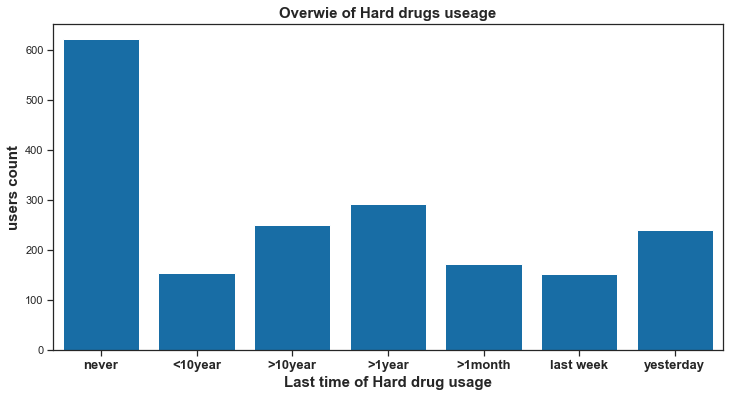

In [456]:
xticks = ['never', '<10year', '>10year','>1year','>1month', 'last week', 'yesterday']
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'hard_last_use', data = ndf, color='#0072BD')
ax.set_title("Overwie of Hard drugs useage", fontsize=15, fontweight="bold")
ax.set_ylabel('users count', fontsize=15, fontweight="bold")
ax.set_xlabel('Last time of Hard drug usage', fontsize=15, fontweight="bold")
ax.set_xticklabels(xticks, fontsize=13, fontweight="bold");

## Regular use: guys that used yesterday

In [458]:
regular1 = df.copy()

for column in drugs_col:
    le = LabelEncoder()
    regular1[column] = le.fit_transform(regular1[column])

#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    regular1.loc[(regular1[drugs_col[i]] < 6),drugs_use[i]] = 0
    regular1.loc[(regular1[drugs_col[i]] > 5),drugs_use[i]] = 1

regular1['hard_regular1'] = pd.np.where(regular1[hard_col_use].eq(1).any(1, skipna=True), 1, 0)

In [459]:
regular1['soft_regular1'] = pd.np.where(regular1[soft_col_use].eq(1).any(1, skipna=True), 1, 0)

In [460]:
regular1['drug_regular1'] = pd.np.where(regular1[['soft_regular1', 'hard_regular1']].eq(1).any(1, skipna=True), 1, 0)

In [461]:
regular1.hard_regular1.value_counts()

0    1638
1     239
Name: hard_regular1, dtype: int64

In [462]:
p= 239/(1638+239) *100
f'Percentage of hard users: {round(p)}%'

'Percentage of hard users: 13%'

In [463]:
regular1.soft_regular1.value_counts()

0    1369
1     508
Name: soft_regular1, dtype: int64

In [464]:
p= 508/(1369+508) *100
f'Percentage of soft user: {round(p)}%'

'Percentage of soft user: 27%'

In [465]:
regular1.drug_regular1.value_counts()

0    1244
1     633
Name: drug_regular1, dtype: int64

In [466]:
p= 633/(1244+633) *100
f'Overall Percentage user: {round(p)}%'

'Overall Percentage user: 34%'

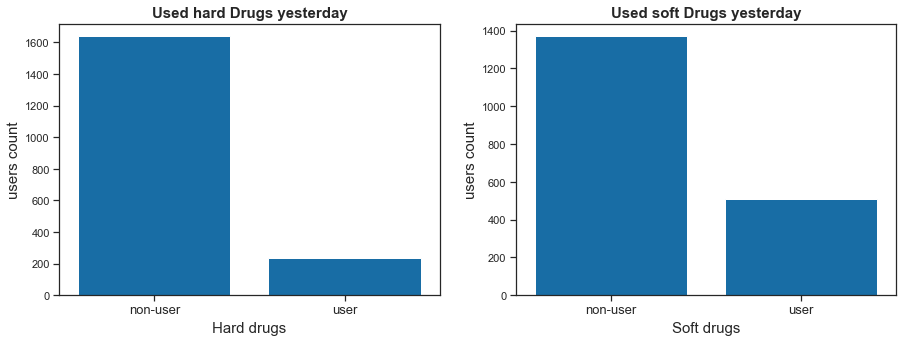

In [501]:
fig,ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.countplot(x = 'hard_regular1', data = regular1, 
              color='#0072BD',ax=ax[0] )
ax2 = sns.countplot(x = 'soft_regular1', data = regular1, 
              color='#0072BD',ax=ax[1] )

xticks = ['non-user', 'user'];
ax1.set_title("Used hard Drugs yesterday", fontsize=15, fontweight="bold")
ax1.set_ylabel('users count', fontsize=15)
ax1.set_xlabel('Hard drugs', fontsize=15)
ax1.set_xticklabels(xticks, fontsize=13);

ax2.set_title("Used soft Drugs yesterday", fontsize=15, fontweight="bold")
ax2.set_ylabel('users count', fontsize=15)
ax2.set_xlabel('Soft drugs', fontsize=15)
ax2.set_xticklabels(xticks, fontsize=13);

## People that used at least once/never used

In [469]:
regular2 = df.copy()

for column in drugs_col:
    le = LabelEncoder()
    regular2[column] = le.fit_transform(regular2[column])

#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    regular2.loc[(regular2[drugs_col[i]] < 1),drugs_use[i]] = 0
    regular2.loc[(regular2[drugs_col[i]] > 0),drugs_use[i]] = 1

regular2['hard_regular2'] = pd.np.where(regular2[hard_col_use].eq(1).any(1, skipna=True), 1, 0)

In [470]:
regular2['soft_regular2'] = pd.np.where(regular2[soft_col_use].eq(1).any(1, skipna=True), 1, 0)

In [471]:
regular2['drug_regular2'] = pd.np.where(regular2[['soft_regular2', 'hard_regular2']].eq(1).any(1, skipna=True), 1, 0)

In [472]:
regular2.hard_regular2.value_counts()

1    1256
0     621
Name: hard_regular2, dtype: int64

In [473]:
p= 1256/(1256+621) *100
f'Percentage of hard users: {round(p)}%'

'Percentage of hard users: 67%'

In [474]:
regular2.soft_regular2.value_counts()

1    1503
0     374
Name: soft_regular2, dtype: int64

In [475]:
p= 1503/(1503+374) *100
f'Percentage of soft user: {round(p)}%'

'Percentage of soft user: 80%'

In [476]:
regular2.drug_regular2.value_counts()

1    1578
0     299
Name: drug_regular2, dtype: int64

In [477]:
p= 1578/(1578+299) *100
f'Overall Percentage user: {round(p)}%'

'Overall Percentage user: 84%'

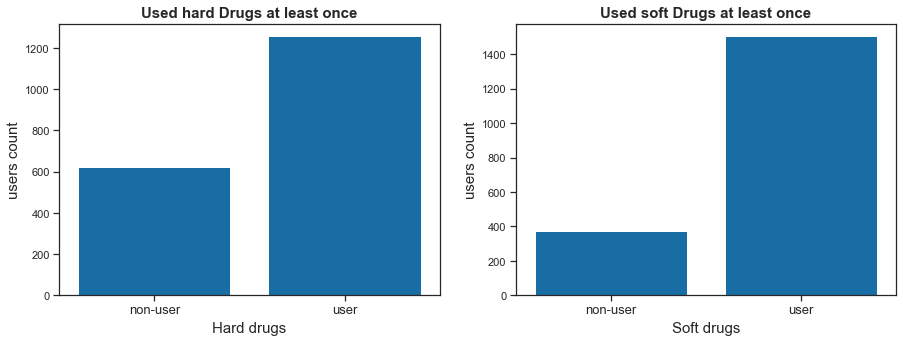

In [502]:
fig,ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.countplot(x = 'hard_regular2', data = regular2, 
              color='#0072BD',ax=ax[0] )
ax2 = sns.countplot(x = 'soft_regular2', data = regular2, 
              color='#0072BD',ax=ax[1] )

xticks = ['non-user', 'user'];
ax1.set_title("Used hard Drugs at least once", fontsize=15, fontweight="bold")
ax1.set_ylabel('users count', fontsize=15)
ax1.set_xlabel('Hard drugs', fontsize=15)
ax1.set_xticklabels(xticks, fontsize=13);

ax2.set_title("Used soft Drugs at least once", fontsize=15, fontweight="bold")
ax2.set_ylabel('users count', fontsize=15)
ax2.set_xlabel('Soft drugs', fontsize=15)
ax2.set_xticklabels(xticks, fontsize=13);

## Used Drugs within the week and setting them as Regulars

In [479]:
regular = df.copy()

for column in drugs_col:
    le = LabelEncoder()
    regular[column] = le.fit_transform(regular[column])

#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    regular.loc[(regular[drugs_col[i]] < 5),drugs_use[i]] = 0
    regular.loc[(regular[drugs_col[i]] > 4),drugs_use[i]] = 1

regular['hard_regular'] = pd.np.where(regular[hard_col_use].eq(1).any(1, skipna=True), 1, 0)

In [480]:
regular['soft_regular'] = pd.np.where(regular[soft_col_use].eq(1).any(1, skipna=True), 1, 0)

In [481]:
regular['drug_regular'] = pd.np.where(regular[['soft_regular', 'hard_regular']].eq(1).any(1, skipna=True), 1, 0)

In [482]:
regular.hard_regular.value_counts()

0    1486
1     391
Name: hard_regular, dtype: int64

In [483]:
p= 391/(1486+391) *100
f'Percentage of hard users: {round(p)}%'

'Percentage of hard users: 21%'

In [484]:
regular.soft_regular.value_counts()

0    1139
1     738
Name: soft_regular, dtype: int64

In [485]:
p= 738/(1139+738) *100
f'Percentage of soft user: {round(p)}%'

'Percentage of soft user: 39%'

In [486]:
regular.drug_regular.value_counts()

0    1022
1     855
Name: drug_regular, dtype: int64

In [487]:
p= 855/(1022+855) *100
f'Overall Percentage user: {round(p)}%'

'Overall Percentage user: 46%'

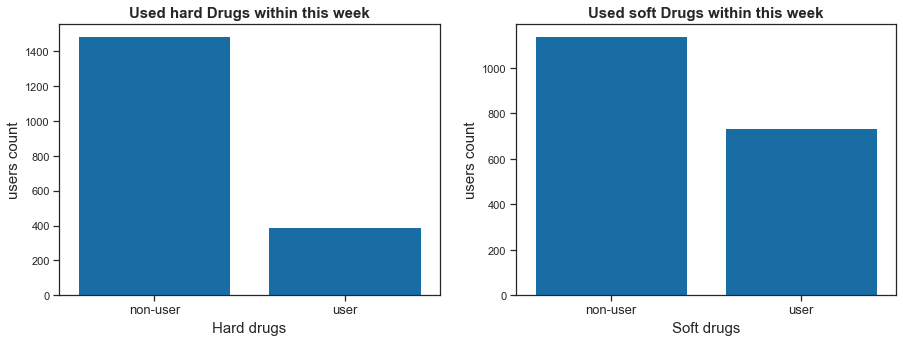

In [505]:
fig,ax =plt.subplots(1,2,figsize=(15, 5))

ax1 = sns.countplot(x = 'hard_regular', data = regular, 
              color='#0072BD',ax=ax[0] )
ax2 = sns.countplot(x = 'soft_regular', data = regular, 
              color='#0072BD',ax=ax[1] )

xticks = ['non-user', 'user'];
ax1.set_title("Used hard Drugs within this week", fontsize=15, fontweight="bold")
ax1.set_ylabel('users count', fontsize=15)
ax1.set_xlabel('Hard drugs', fontsize=15)
ax1.set_xticklabels(xticks, fontsize=13);

ax2.set_title("Used soft Drugs within this week", fontsize=15, fontweight="bold")
ax2.set_ylabel('users count', fontsize=15)
ax2.set_xlabel('Soft drugs', fontsize=15)
ax2.set_xticklabels(xticks, fontsize=13);


<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1111
           1       0.59      0.17      0.27       296

    accuracy                           0.80      1407
   macro avg       0.70      0.57      0.58      1407
weighted avg       0.77      0.80      0.75      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       375
           1       0.48      0.13      0.20        95

    accuracy                           0.80       470
   macro avg       0.65      0.55      0.54       470
weighted avg       0.75      0.80      0.74       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


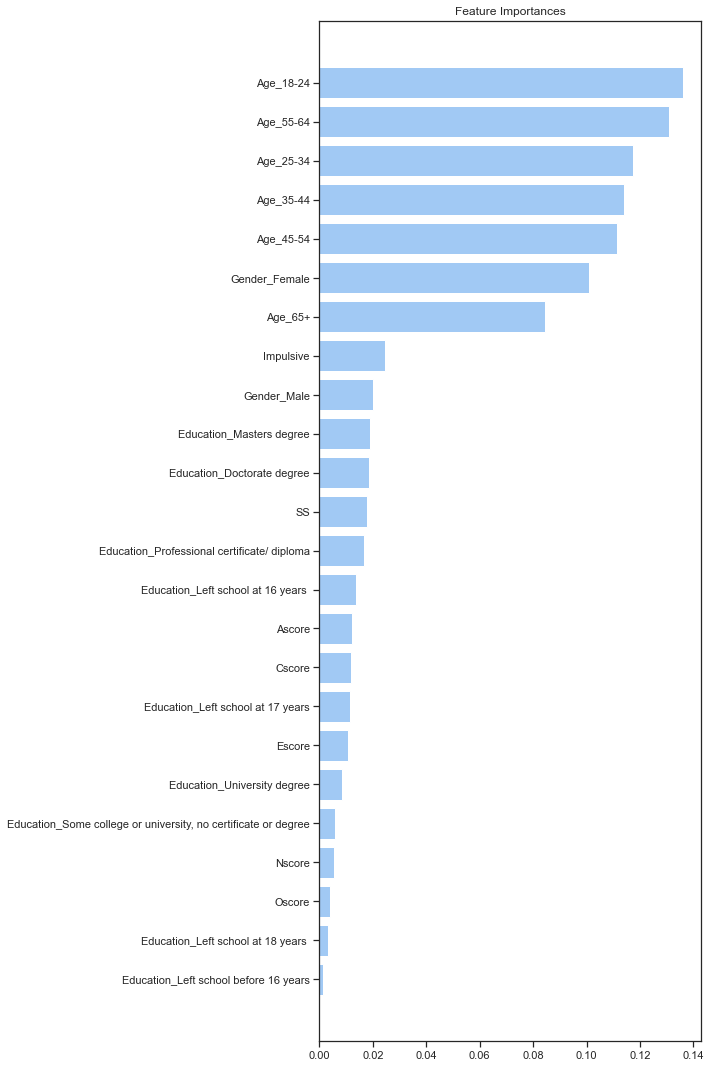


<class 'xgboost.sklearn.XGBClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1111
           1       0.54      0.21      0.30       296

    accuracy                           0.80      1407
   macro avg       0.68      0.58      0.59      1407
weighted avg       0.76      0.80      0.76      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       375
           1       0.41      0.14      0.20        95

    accuracy                           0.79       470
   macro avg       0.61      0.54      0.54       470
weighted avg       0.73      0.79      0.74       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


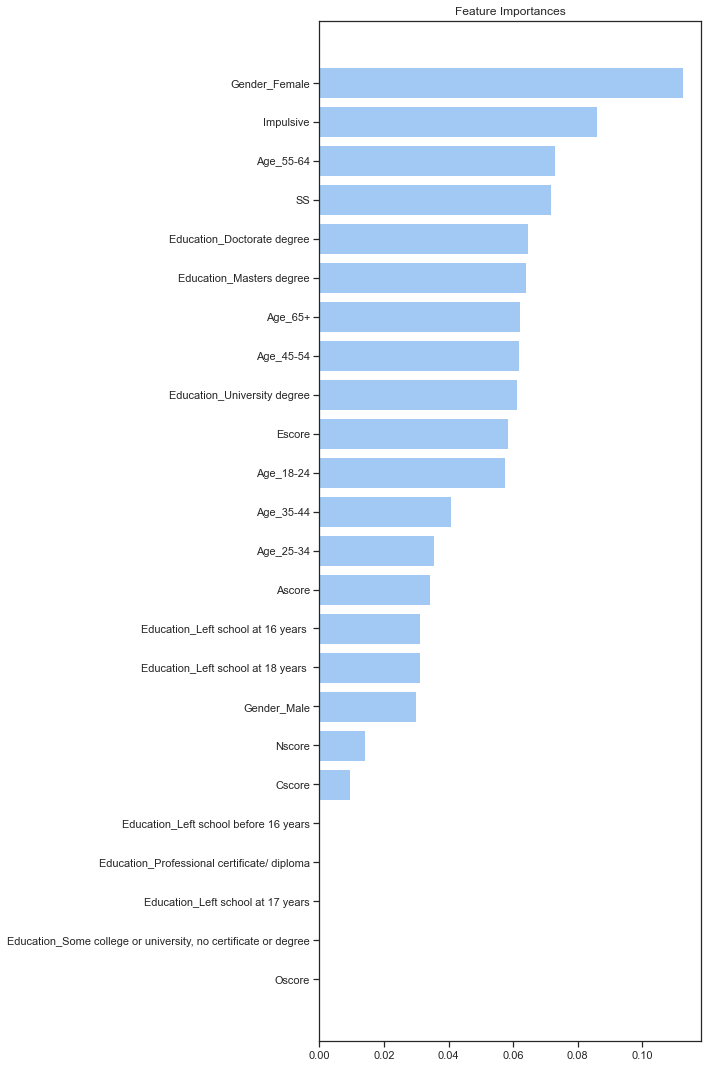


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1111
           1       0.44      0.25      0.32       296

    accuracy                           0.77      1407
   macro avg       0.63      0.58      0.59      1407
weighted avg       0.74      0.77      0.75      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       375
           1       0.45      0.26      0.33        95

    accuracy                           0.79       470
   macro avg       0.64      0.59      0.60       470
weighted avg       0.76      0.79      0.76       470


Did not work!

<class 'sklearn.svm._classes.SVC'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1111
           1       0.57      0.07      0.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


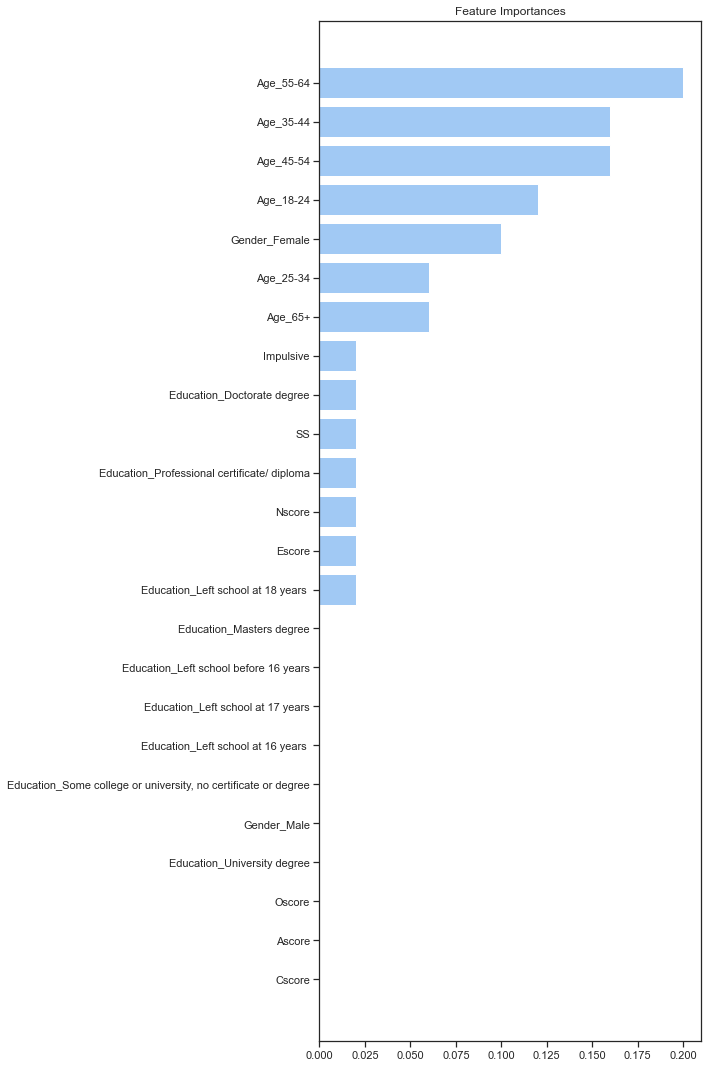


<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Results on training data: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1111
           1       0.32      0.36      0.34       296

    accuracy                           0.71      1407
   macro avg       0.57      0.58      0.58      1407
weighted avg       0.72      0.71      0.71      1407


Results on test data:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       375
           1       0.25      0.27      0.26        95

    accuracy                           0.69       470
   macro avg       0.53      0.53      0.53       470
weighted avg       0.70      0.69      0.69       470




/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


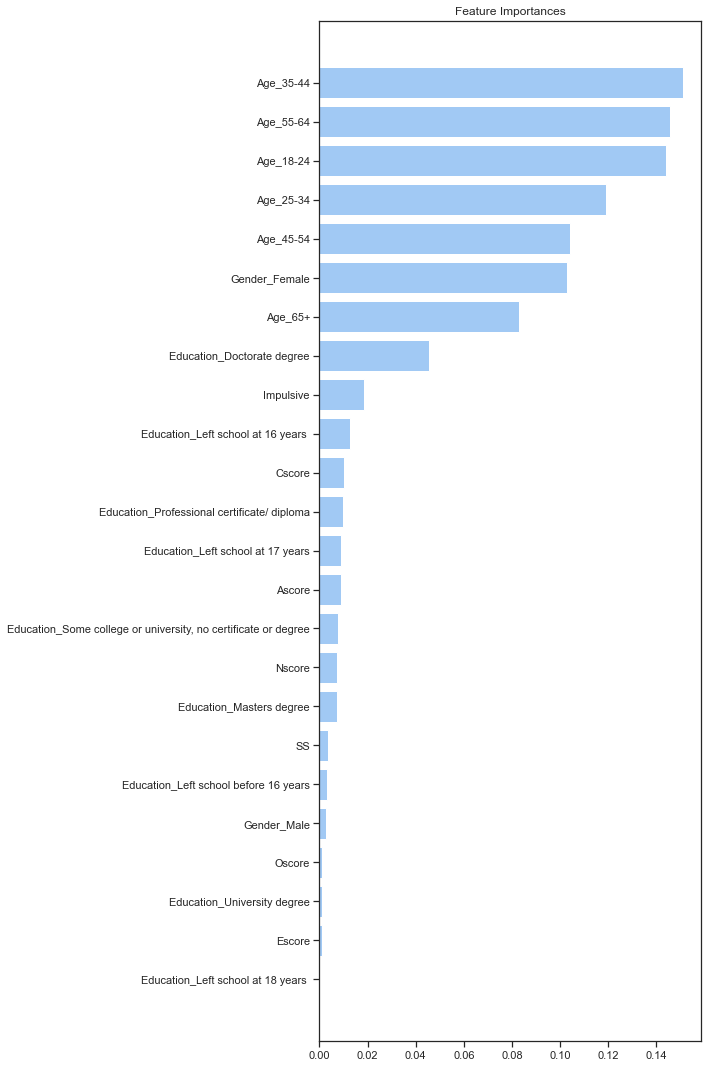

In [489]:
pipeline_test(df_users.iloc[:,:10], regular.hard_regular)

# Invastigating the Gender

## Our users: people that took drugs this year

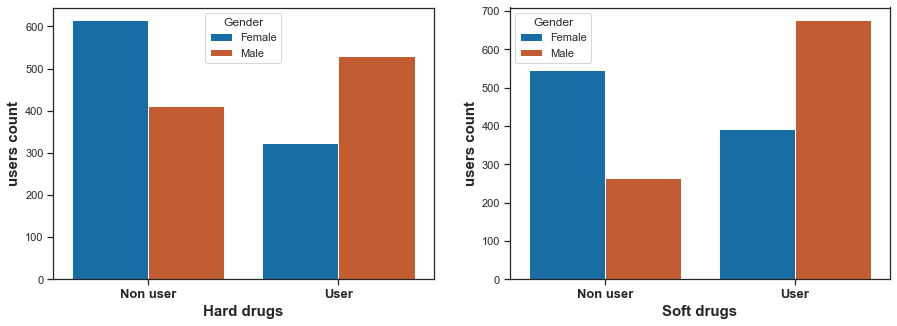

In [490]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
color=['#0072BD','#D95319']
sns.set_style("ticks")
ax1 = sns.countplot(x = 'hard_usage' , hue = 'Gender', data = df_users, ax=ax[0], palette=color)

ax2 = sns.countplot(x = 'soft_usage' , hue = 'Gender', data = df_users, ax=ax[1], palette=color)

xticks = ['Non user', 'User']

#ax1.set_title("Gender vs Hard drug usage", fontsize=15, fontweight="bold")
ax1.set_ylabel('users count', fontsize=15, fontweight="bold")
ax1.set_xlabel('Hard drugs', fontsize=15, fontweight="bold")
ax1.set_xticklabels(xticks, fontsize=13, fontweight="bold")


#ax2.set_title("Gender vs Soft drug usage", fontsize=15, fontweight="bold")
ax2.set_ylabel('users count', fontsize=15, fontweight="bold")
ax2.set_xlabel('Soft drugs', fontsize=15, fontweight="bold")
ax2.set_xticklabels(xticks, fontsize=13, fontweight="bold");
plt.savefig("figures/drug_gender.png")

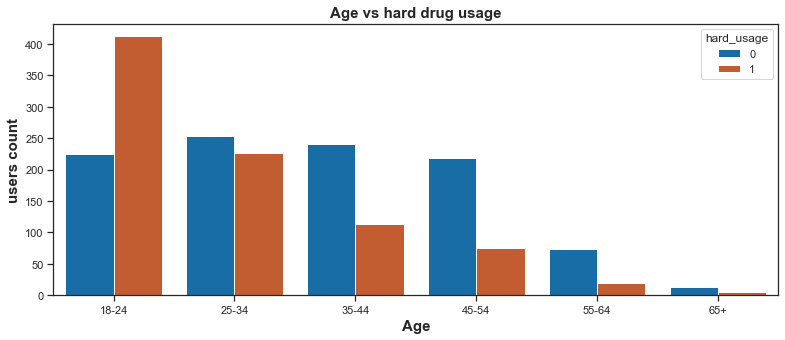

In [491]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.countplot(x = 'Age' , hue = 'hard_usage', data = df_users, order = df['Age'].value_counts().index,palette=color);


ax.set_title("Age vs hard drug usage", fontsize=15, fontweight="bold")
ax.set_ylabel('users count', fontsize=15, fontweight="bold")
ax.set_xlabel('Age', fontsize=15, fontweight="bold");
#ax.set_xticklabels(xticks, fontsize=13, fontweight="bold");

## Regular Using (<1Week)

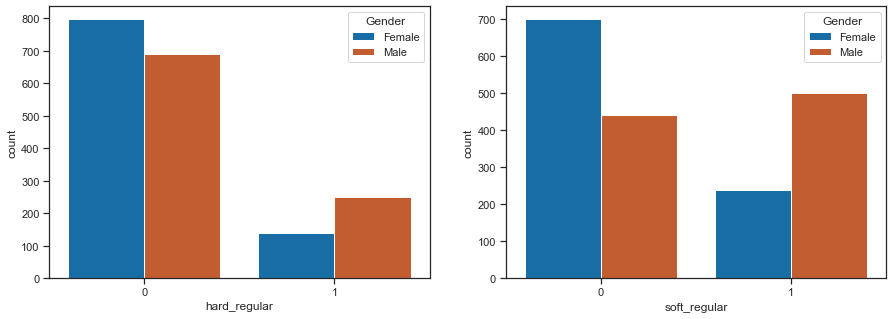

In [492]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))

sns.countplot(x = 'hard_regular' , hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = 'soft_regular' , hue = 'Gender', data = regular, ax=ax[1],palette=color);

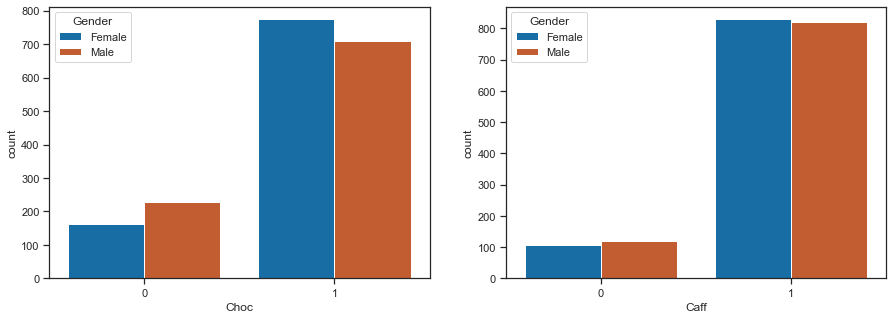

In [493]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Choc'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['Caff'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

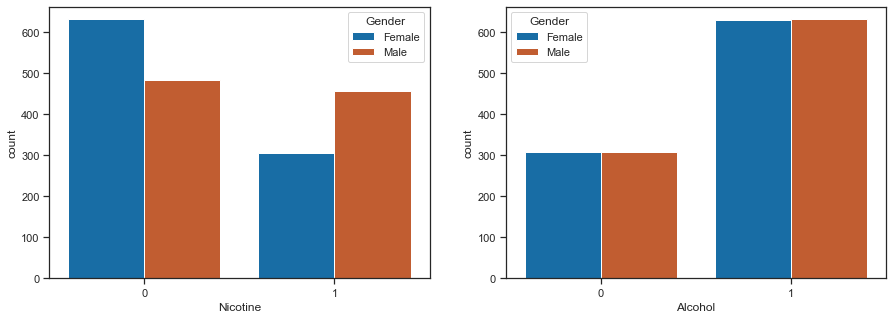

In [494]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Nicotine'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['Alcohol'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

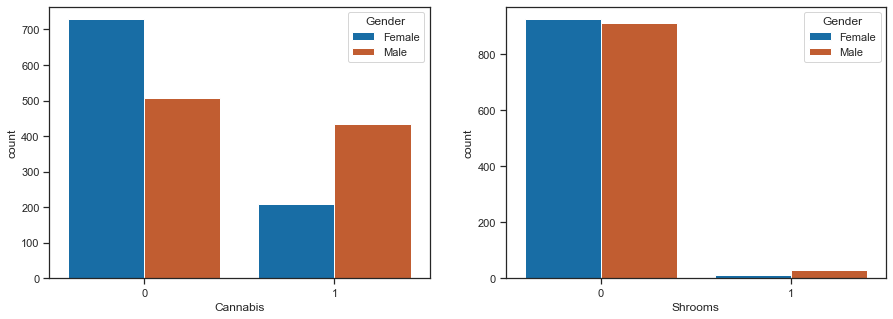

In [495]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Cannabis'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['Shrooms'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

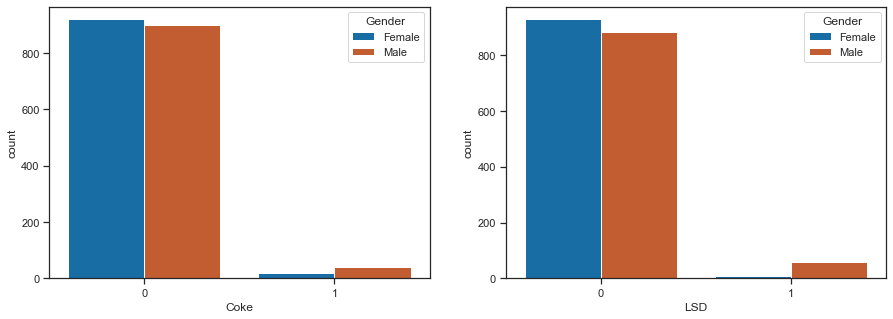

In [496]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Coke'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['LSD'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

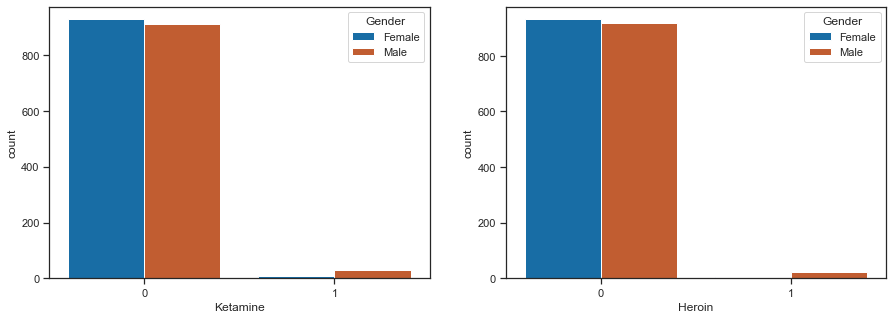

In [497]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Ketamine'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['Heroin'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

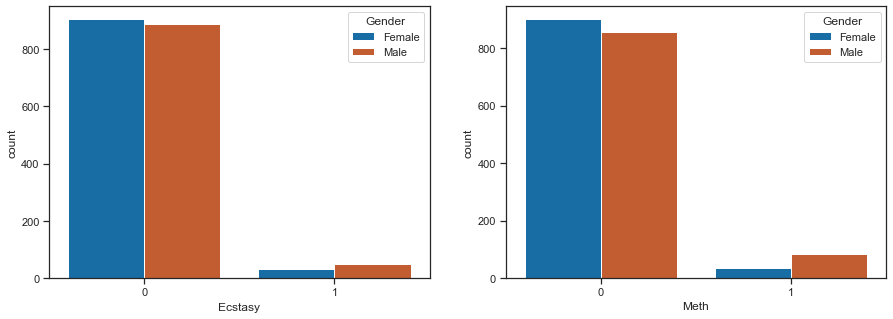

In [498]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x = regular['Ecstasy'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[0],palette=color)
sns.countplot(x = regular['Meth'].apply(lambda x: 1 if x > 4 else 0) , 
              hue = 'Gender', data = regular, ax=ax[1],palette=color)
plt.show()

# Summary

- [x] Replaced the numeric data with the real names and deleted the 8 observation that had the fictional drug Semeron.
- [x] Investigate the bias of our dataset and found out that we have very high level of education, very high rate of drug users and a abnormal difference of drug users between countries. This bias made us exclude the country and Ethnicity from our predictions.
- [x] We separated our drugs to soft and hard according the the impact they have on health and the level of addiction they cause. We excluded smoking and alcohol, because almost everybody in our dataset drunk yesterday and the rate of smokers is incredibly high.
- [x] our main definition of a drug user was a person the took drugs at least once in the last year. Later on we examined the the 'frequency' of using, ig. people that took drugs yesterday or people that never used.
- [x] An exhaustive search with a pipeline was performed to select the most effective subset of input features. We  then applied a grid search with our most promising features. We mainly took as the demographical personality features and made prediction of drug users. We can to the conclusion that high scores of Openness, Impulsiveness and sensession seeking behavior increase the risk for drug usage and that it is indeed possible to predict hard drug usage for "high scores"
- [x] Reviewed the difference between gender and drug usage to find out that the rate of male drug users is significantly higher.

# Future work

- Collect samples that allow the usage of the country feature and that represent the overall population of the countries
- Get time-related data to find out more about the relationship between drug usage and time-related factors
- Gather information about the effect of preventive actions regarding hard drug usage
- Use unsupervised learning algorithm to create clusters of different drugs and personality types